# Analysis of pre- and post data

Analysis yeahhhh !!!!

In [572]:
import glob 
import matplotlib.colors as mcolors
import os 
import IPython.display 
import librosa 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import librosa.display 
import IPython.display as ipd
from pandas.plotting import scatter_matrix
from IPython.display import SVG, display
import random
import math
import pygal
import scipy 
import matplotlib.style
import matplotlib as mpl
import seaborn as sn
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.graph_objects as go
from matplotlib import pyplot
import copy
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit

In [573]:
mpl.style.use('ggplot')
plt.style.use('ggplot')
couleurs = mcolors.CSS4_COLORS
Tcolors = list(couleurs.keys())

In [574]:
def get_abilities_files():
    #conda update pandas 
    clf_names = [
                'KNN1', 'KNN2', 'KNN3', 'KNN4', 'KNN5', 'KNN6', 
                'SVC1', 'SVC2', 'SVC3', 'SVC4', 'SVC5', 'SVC6',  
                'GaussProc1', 'GaussProc2', 'GaussProc3', 'GaussProc4', 'GaussProc5', 'GaussProc6',
                'DecTree1', 'DecTree2', 'DecTree3', 'DecTree4', 'DecTree5', 'DecTree6', 
                'RandForest1', 'RandForest2', 'RandForest3', 'RandForest4', 'RandForest5', 'RandForest6', 
                'MLP1', 'MLP2', 'MLP3', 'MLP4', 'MLP5', 'MLP6',
                'Adaboost1', 'Adaboost2', 'Adaboost3', 'Adaboost4', 'Adaboost5', 'Adaboost6',
                'LogisticRegr1', 'LogisticRegr2', 'LogisticRegr3', 'LogisticRegr4', 'LogisticRegr5', 'LogisticRegr6',
                'NaiveBayes', 
                'ExtraTree1', 'ExtraTree2', 
                'Dummy', 
                'Voting(SVC)'
                ]

    a = [x+'[filtered]' for x in clf_names]
    b = [x+'[stratified]' for x in clf_names]
    a.extend(b)
    
    clfs_abilities_combined = [
    "RASCH_COMBINED_clfs_parameters.csv",
    "1PL_COMBINED_clfs_parameters.csv",
    "2PL_COMBINED_clfs_parameters.csv",
    "3PL_COMBINED_clfs_parameters.csv",
    "3PL_COMBINED_GUESS_clfs_parameters.csv"]

    return clfs_abilities_combined, a

def get_items_parameters_files():
    clf_names = ['KNN', 'SVC', 'Gaussian Process', 'Decision Tree', 'Random Forest', 'MLP', 'Adaboost1', 'Naive Bayes', 'Logistic regresion', 'ExtraTree', 'Random', 'AdaBoost2', 'Voting Hard', 'Voting Soft']
    items_parameters_combined = [
    "RASCH_COMBINED_items_parameters.csv",
    "1PL_COMBINED_items_parameters.csv",
    "2PL_COMBINED_items_parameters.csv",
    "3PL_COMBINED_items_parameters.csv",
    "3PL_COMBINED_GUESS_items_parameters.csv"]

    return items_parameters_combined

def get_labels(list_test) :
    test_labels = []
    for index in list_test : 
        test_labl = math.floor(index / 100)
        test_labels.append(test_labl)
        
    return test_labels

def read_data_frame() :
    all_data = ['genres/blues/*', 'genres/classical/*', 'genres/country/*', 'genres/disco/*', 'genres/hiphop/*', 'genres/jazz/*', 'genres/metal/*',  'genres/pop/*',  'genres/reggae/*', 'genres/rock/*']
    all_the_songs_data = glob.glob(all_data[0]) + glob.glob(all_data[1]) + glob.glob(all_data[2]) + glob.glob(all_data[3]) + glob.glob(all_data[4]) + glob.glob(all_data[5]) + glob.glob(all_data[6]) + glob.glob(all_data[7]) + glob.glob(all_data[8]) + glob.glob(all_data[9]) 
    assert len(all_the_songs_data) == 1000
    dt = np.dtype(int)
    RESPONSE_TEST_INDICES = np.loadtxt('intersections.txt', dtype = dt)
    return np.array(all_the_songs_data), RESPONSE_TEST_INDICES, all_data

def read_songs_data() :
    all_data = ['genres/blues/*', 'genres/classical/*', 'genres/country/*', 'genres/disco/*', 'genres/hiphop/*', 'genres/jazz/*', 'genres/metal/*',  'genres/pop/*',  'genres/reggae/*', 'genres/rock/*']
    all_the_songs_data = glob.glob(all_data[0]) + glob.glob(all_data[1]) + glob.glob(all_data[2]) + glob.glob(all_data[3]) + glob.glob(all_data[4]) + glob.glob(all_data[5]) + glob.glob(all_data[6]) + glob.glob(all_data[7]) + glob.glob(all_data[8]) + glob.glob(all_data[9]) 
    assert len(all_the_songs_data) == 1000
    s = []
    for x in all_the_songs_data :
        sx = x.replace('genres/', '')
        sxx = sx.replace('\\', '/')
        sxx = sxx[sxx.find('/')+1:]
        s.append(sxx)
    
    return all_the_songs_data, s, all_data

def play_audio(data, index) :
    ipd.Audio(data[index], autoplay = True)
    
def play_audio_Ipython(data, index) :
    return ipd.Audio(data[index])

def play_sound(data, index):
    playsound(data[index])
    
def items_index_zero_and_perfect_responses(irt_fil = "IRT_NORMAL_FILT_STRAT.dat"): 
    
    dt = np.dtype(int)
    irt_matrix = np.loadtxt(irt_fil, dtype = dt)

    row, col = np.shape(irt_matrix)
    range_items = np.arange(col).tolist()

    takeOff_index = []
    for e in range(col) :
        tmp = irt_matrix[:,e]
        tmp = sum(tmp)
        if tmp <= 0 :
            takeOff_index.append(e)
            range_items.remove(e)
    
    return takeOff_index, np.array(range_items)

def dont_know_why() :
    element_names = df_data["Unnamed: 0"].tolist()
    print(element_names)
    element_names = df_data["Unnamed: 0"].tolist()
    element_names = [int(e.replace('V', '')) for e in element_names]
    print(element_names)
    neg_disc = df_data['Discrimination'] < 0
    df_data[neg_disc]
    
    zeros_names = df_test["Unnamed: 0"].tolist()
    disc = [int(e.replace('V', '')) for e in zeros_names]
    disc = np.array(disc) - 1
    print(disc)
    # discrimination = np.where(disc > takeOff_index[0], disc + 1, disc)
    # print(discrimination)
    takeOff_index, range_items = items_index_zero_and_perfect_responses()
    print(takeOff_index)
    print(range_items)
    print(len(range_items))
    old_list = np.arange(10).tolist()
    takeOff_index = [4,5]
    print(take_off(old_list , takeOff_index))
    #df_data.insert(1, "index", range_items )
    
def some_colours(categories) :
    # like this : 
    #categories = ['blues','classical','country','disco','hiphop',
    #             'jazz','metal','pop','reggae','rock']
    colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
    print(colors)
    
def take_off(old_list , takeOff_index) :
    
    test_items_group = copy.deepcopy(old_list)
    length = len(takeOff_index)
    takeOff_index = np.array(takeOff_index) 
    for e in range(length) :
        #print(takeOff_index)
        #print("e = ", e)
        #print("len= ", len(test_items_group))
        test_items_group.pop(takeOff_index[e])
        takeOff_index = takeOff_index - 1
        
    return test_items_group

def show_svg(fil = "xy_chart.svg"):
    from IPython.display import SVG, display
    display(SVG(fil))
    
def get_dataframe_of_items(indexModel = 2, capt = "Items with negative discriminant" ) :
    dataX,RESPONSE_TEST_INDICES, _ = read_data_frame()
    tests_songs = dataX[RESPONSE_TEST_INDICES]
    songs_indices = np.array(np.arange(1000))
    songs_indices = songs_indices[RESPONSE_TEST_INDICES]

    items_parameters = get_items_parameters_files()
    fil = items_parameters[indexModel]
    print(fil)
    df_data = pd.read_csv(fil)

    # convert all the file names from 'genres/rock\\rock.00039.wav' -> 'rock.00039' 
    # from the irt matrix calculate the index of the element have only 1 or 0 -> takeOff_index
    # eleminate the element at indices [takeOff_index] from the back list
    back = [expri[expri.find('\\')+1:].replace('.wav', '') for expri in tests_songs]
    takeOff_index, _ = items_index_zero_and_perfect_responses()
    tests_songs_names = take_off(back , takeOff_index)
    #print(tests_songs_names)
    #print(len(tests_songs_names))

    df_data.insert(1, "Title", tests_songs_names )
    
    # if indexModel == 1  :
    if "Guessing" not in df_data.columns :
        row, col = df_data.shape
        guess_param = [0]*row
        df_data.insert(col, "Guessing", guess_param )
    
    neg_disc = df_data['Discrimination'] < 0
    df_data_neg = df_data[neg_disc]
    
    df_data_neg_latex = df_data_neg.to_latex(index=False, caption = capt)
    
    
    zeros_names = df_data_neg["Unnamed: 0"].tolist()
    disc = [int(e.replace('V', '')) for e in zeros_names]
    disc = np.array(disc) - 1
    songs = []
    for element in disc : 
        s = play_audio_Ipython(tests_songs, element)
        songs.append(s)
    
    return df_data_neg, df_data_neg_latex, songs, df_data

In [575]:
def get_songs_titles():
    gtzan_index = pd.read_csv("GTZANindex.csv") 
    return np.array(list(gtzan_index['track_name']))

def dataFrame_of_testData(show = False) :
    
    dt = np.dtype(int)
    RESPONSE_TEST_INDICES = np.loadtxt('intersections.txt', dtype = dt)
    #print("RESPONSE_TEST_INDICES = ", RESPONSE_TEST_INDICES)
    _, songs_dataX, _ = read_songs_data() 
    songs_dataX = np.array(songs_dataX)
    lengthF = len(RESPONSE_TEST_INDICES)
    #print(lengthF)
    song_names = songs_dataX[RESPONSE_TEST_INDICES]
    songs_indices = np.array(np.arange(1000))
    songs_indices = songs_indices[RESPONSE_TEST_INDICES]
    songs_titles = get_songs_titles()
    songs_titles = songs_titles[RESPONSE_TEST_INDICES]
    items_index = []
    for i in range(lengthF):
        i = i + 1
        items_index.append('V' + str(i))

    raw_data = {
    'Item':[],
    'Index': [],
    'File name': [],
    'Title': []
    }

    raw_data['Item'] = items_index
    raw_data['Index'] = songs_indices
    raw_data['File name'] = song_names
    raw_data['Title'] = songs_titles
    daf_songs_test = pd.DataFrame(raw_data)
    
    laTex = daf_songs_test.to_latex(index=False, caption = "Test data")
    
    if show :
        print(daf_songs_test.to_string())

    return daf_songs_test, laTex

In [576]:
def plot_difficulty_discrimination_model(indexModel = 3) :

    items_parameters = get_items_parameters_files()
    fil = items_parameters[indexModel]
    print(fil)
    df_data = pd.read_csv(fil)

    dt = np.dtype(int)
    RESPONSE_TEST_INDICES = np.loadtxt('intersections.txt', dtype = dt)
    test_items_group = get_labels(RESPONSE_TEST_INDICES)
    takeOff_index, _ = items_index_zero_and_perfect_responses()
    test_items_group = take_off(test_items_group , takeOff_index)
    _,songXY, _ = read_songs_data()
    songXY = np.array(songXY)
    test_songs = songXY[RESPONSE_TEST_INDICES]
    test_items_songs = take_off(test_songs.tolist() , takeOff_index)

    df_data.insert(1, "Label", test_items_group )
    df_data.insert(1, "Songs", test_items_songs )

    df_data_acc_diff = df_data.loc[:,["Discrimination", "Difficulty"]]
    df_data_acc_diff = df_data_acc_diff[df_data_acc_diff["Difficulty"] > -100]
    df_data_acc_diff = df_data_acc_diff[df_data_acc_diff["Difficulty"] <  100]
    #print(df_data_acc_diff.to_latex(index=False, caption = "Items with negative discriminant"))
    df_data_acc_diff = df_data_acc_diff.to_numpy()
    print(np.shape(df_data_acc_diff))
    print(np.shape(df_data_acc_diff[:,0]))
    print()
    print(np.shape(df_data_acc_diff[:,1]))
    #pyplot.scatter(df_data_acc_diff[:,0], df_data_acc_diff[:,1])

    categories = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
    colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
    indexes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    for index, i in enumerate(indexes) :
        df_tmp = df_data[df_data["Label"] == i]
        df_tmp = df_tmp[df_tmp["Difficulty"] > -100]
        df_tmp = df_tmp[df_tmp["Difficulty"] <  100]
        dat = df_tmp.loc[:,["Discrimination", "Difficulty"]].to_numpy()
        #print("genres = ", genres[i])
        #xy_chart.add(genres[i], dat)
        plt.scatter(dat[:,0], dat[:,1], s=20, c=colors[index], label=categories[index])

    #plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000), xlabel='Area', ylabel='Population')
    plt.gca().set(xlabel='Discrimination', ylabel='Difficulty')
    plt.title("Scatterplot of items Discrimination vs Difficulty")
    plt.legend(fontsize=11, shadow=False, borderaxespad=0, frameon=False)
    save_file_name = 'scatterplot_difficulty_disc_model_' + str(indexModel) + '.png'
    plt.savefig(save_file_name)  
    #ax.legend(loc='upper center', fontsize=11, bbox_to_anchor=(1.03, 1.014),  shadow=False, borderaxespad=0, frameon=False)
    
def plot_accuracy_ability(index = 2) :

    df_clfs_accuracy = pd.read_csv("all_classifiers_accuracy.csv")
    s1 = df_clfs_accuracy["Filtered data"].tolist()
    s2 = df_clfs_accuracy["Stratified data"].tolist()
    all_clfs_accuracy = np.concatenate((s1,s2), axis = 0) # 106
    
    clfs_abilities, _= get_abilities_files()
    clfs_ability = clfs_abilities[index]
    df_clfs_ability = pd.read_csv(clfs_ability)
    clfs_ability_values = df_clfs_ability["Abilities"].tolist()
    
    fig, ax = plt.subplots()
    pyplot.scatter(all_clfs_accuracy, clfs_ability_values)
    textn = ''
    title_obj = ax.set_title('Scatter plot ability vs accuracy ' + str(index))
    ax.set_ylabel('Ability', color = "black", fontsize = 15)
    ax.set_xlabel('Accuracy', color = "black", fontsize = 15)
    save_file_name = 'scatter_plot_acc_ab_irt' + str(index) + '.png'
    plt.savefig(save_file_name)  
    
    
def create_tables_classifiers_abilities(clfs_abilities_filtered, clf_names) :
    raw_data = {
    'Classifiers':[],
    'Rasch': [],
    '1PL': [],
    '2PL': [],
    '3PL': [],
    '3PLg': []
    }
    print("clfs_abilities_filtered = ",clfs_abilities_filtered)
    head_keys = list(raw_data.keys())
    for index, fil in enumerate(clfs_abilities_filtered) : 
        index = index + 1
        data = pd.read_csv(fil) 
        values = data['Abilities'].tolist()
        print("values = ", np.shape(values))
        raw_data[head_keys[index]] = values 
        
    raw_data[head_keys[0]] = clf_names 
    df = pd.DataFrame(raw_data, index = clf_names)
    
    return df

In [577]:
def example_df() : 
    raw_data = {'name': ['Willard Morris', 'Al Jennings', 'Omar Mullins', 'Spencer McDaniel'],
    'age': [20, 19, 22, 21],
    'favorite_color': ['blue', 'red', 'yellow', "green"],
    'grade': [88, 92, 95, 70]}
    #df = pd.DataFrame(raw_data, index = ['Willard Morris', 'Al Jennings', 'Omar Mullins', 'Spencer McDaniel'])
    df = pd.DataFrame(raw_data)
    
    return df

def zip_dataframe_rows(df,  index = 53) :
    df1 = df.iloc[0:index,:]
    df2 = df.iloc[index:,:]
    row1, col1 = df1.shape
    row2, col2 = df2.shape
    assert row1 == row2 
    assert col1 == col2 
    df_tmp = pd.DataFrame()
    for i in range(row1) :
        df_tmp = pd.concat([df_tmp, df1.iloc[[i], :] ])
        df_tmp = pd.concat([df_tmp, df2.iloc[[i], :] ])  
        

    # Test
    """
    df = example_df()
    df_zip = zip_dataframe_rows(df,  index = 2)
    df_zip

    """
        
    return df_tmp


In [563]:
def read_data() :
    all_data = ['genres/blues/*', 'genres/classical/*', 'genres/country/*', 'genres/disco/*', 'genres/hiphop/*', 'genres/jazz/*', 'genres/metal/*',  'genres/pop/*',  'genres/reggae/*', 'genres/rock/*']
    all_the_songs_data = glob.glob(all_data[0]) + glob.glob(all_data[1]) + glob.glob(all_data[2]) + glob.glob(all_data[3]) + glob.glob(all_data[4]) + glob.glob(all_data[5]) + glob.glob(all_data[6]) + glob.glob(all_data[7]) + glob.glob(all_data[8]) + glob.glob(all_data[9]) 
    assert len(all_the_songs_data) == 1000
    return all_the_songs_data, all_data

def get_num_by_procent(end = 443, percent = 0.1) :
    index = end /(percent * end) + 1
    index = round(index)
    return int(index)

def list_element(X_end = 443, percent = 0.2) :
    ind = get_num_by_procent(end = X_end, percent = percent)
    sp = np.linspace(0, X_end, num=ind)
    spx = [int(np.round(el)) for el in sp]
    return spx

def confusion_matrix_plot(conf_matrix, class_names, normalize = False, title = 'confusion_matrix.png' ) :
    mpl.style.use('seaborn')
    
    if normalize :
        denom = np.sum(conf_matrix, 1)
        R = conf_matrix.T / denom
        conf_matrix = R.T

    df_cm = pd.DataFrame(conf_matrix, index = class_names, columns = class_names)

    fig = plt.figure()
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)

    cmap = sns.cubehelix_palette(light=1, as_cmap=True)

    if normalize :
        res = sn.heatmap(df_cm, annot=True, vmin=0.0, vmax=1.0, fmt='.2f', cmap=cmap)
    else :
        res = sn.heatmap(df_cm, annot=True, vmin=np.min(conf_matrix), vmax= np.max(conf_matrix), fmt='.2f', cmap=cmap)
    #res.invert_yaxis()

    #plt.yticks([0.5,1.5,2.5], class_names,va='center')
    plt.title('Confusion Matrix')
    plt.savefig(title )
    #plt.show()
    plt.close()
    
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

def calculate_feats_tets(dat) :  
    data_features = []
    labels = []
    labels_titles = [] 
    data_frame_title = []
    all_data_categories = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
    data_frame_title = ["zero_crossing_mean","zero_crossing_std", "sptrlCentroid_mean", 
                        "sptrlCentroid_std", "spec_bw_mean", "spec_bw_std","rolloff_mean", "rolloff_std"]
    std_mean = ["mean","std"]
    for i in range(14) :
        index = math.floor(i / 7)
        data_frame_title.append("spec_contrst_" + std_mean[index] + str(i))
    for i in range(26) :
        index = math.floor(i / 13)
        data_frame_title.append("mfccs_" + std_mean[index] + str(i))
    
    for index, song in enumerate(data) : 
        x, s_rate = librosa.load(song)  
        zcrs = librosa.feature.zero_crossing_rate(x)
        spectralCentroid = librosa.feature.spectral_centroid(y = x, sr = s_rate)
        spec_bw = librosa.feature.spectral_bandwidth(y = x, sr = s_rate)
        rolloff = librosa.feature.spectral_rolloff(y = x, sr = s_rate)
        spec_contrst =  librosa.feature.spectral_contrast(y = x, sr = s_rate)
        spec_contrst_mean = np.mean(spec_contrst, axis = 1).tolist()
        spec_contrst_std = np.std(spec_contrst, axis = 1).tolist()
        # Spetral contrast features 
        spec_contrst_feat = np.concatenate((spec_contrst_mean, spec_contrst_std))
        mfccs = librosa.feature.mfcc(y = x, sr = s_rate, n_mfcc=13)
        mfccs_mean = mfccs.mean(axis=1).tolist()
        mfccs_std = np.std(mfccs,axis=1).tolist()
        # mfccs features 
        mfccs_feats = np.concatenate((mfccs_mean, mfccs_std))
        intermediate_feats = np.concatenate((spec_contrst_feat, mfccs_feats))
        
        # , np.mean(), np.std()
        # ,"", ""
        feat_vect = [np.mean(zcrs), np.std(zcrs), np.mean(spectralCentroid), np.std(spectralCentroid), np.mean(spec_bw), np.std(spec_bw), np.mean(rolloff), np.std(rolloff)]
        fatures_vect = np.concatenate((feat_vect, intermediate_feats))
        data_features.append(fatures_vect)
        label = math.floor(index / 100)
        labels.append(label)
        labels_titles.append(all_data_categories[label])
        
    #np.savetxt("FeaturesDataset.txt", data_features, fmt='%f') 
    
    return data_features, labels, labels_titles, data_frame_title


def read_feats_tets(dat) :  
    data_features = np.loadtxt("FeaturesDataset.txt")
    labels = []
    labels_titles = [] 
    data_frame_title = []
    all_data_categories = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
    data_frame_title = ["zero_crossing_mean","zero_crossing_std", "sptrlCentroid_mean", "sptrlCentroid_std", "spec_bw_mean", "spec_bw_std","rolloff_mean", "rolloff_std"]
    std_mean = ["mean","std"]
    for i in range(14) :
        index = math.floor(i / 7)
        data_frame_title.append("spec_contrst_" + std_mean[index] + str(i))
    for i in range(26) :
        index = math.floor(i / 13)
        data_frame_title.append("mfccs_" + std_mean[index] + str(i))
    
    for index, song in enumerate(dat) : 
        label = math.floor(index / 100)
        labels.append(label)
        labels_titles.append(all_data_categories[label])
    
    return data_features, labels, labels_titles, data_frame_title

In [564]:
def analyse_filtered_index_union_trainVal() :
    #indices = np.array([False]*1000)
    test_indices = np.array([False]*1000)
    train_indices = np.array([False]*1000)
    validation_indices = np.array([False]*1000)
    file_train = 'train_filtered_index.txt'
    file_test = 'test_filtered_index.txt'
    file_val = 'val_filtered_index.txt'
    
    list_train = np.loadtxt(file_train)
    list_test = np.loadtxt(file_test)
    list_val = np.loadtxt(file_val)
    # Convert doube to int for array indexing
    list_train = list_train.astype(int)
    list_test = list_test.astype(int)
    list_val = list_val.astype(int)
    
    train_indices[list_train] = True
    test_indices[list_test] = True
    
    all_index_trainValTest = np.concatenate((list_train, list_test))
    #all_index_trainValTest = np.concatenate((all_index_trainValTest, list_test))

    validation_indices[all_index_trainValTest] = True
    
    tttt = np.arange(1000)
    set_train = set(tttt[train_indices].tolist())
    set_test = set(tttt[test_indices].tolist())
    set_val = set(tttt[~validation_indices].tolist())

    z_train_test = set_train.intersection(set_test) 
    z_train_valid = set_train.intersection(set_val) 
    z_valid_test = set_val.intersection(set_test) 
    print("Print intersection train & test = ", z_train_test)
    print("Print intersection train & valid = ", z_train_valid)
    print("Print intersection test & valid = ", z_valid_test)
    print()
    
    
    return train_indices, test_indices, ~validation_indices


def stratified_partition(list_train, size = 0.114) :
    train_labels = get_labels(list_train)
    sss = StratifiedShuffleSplit(n_splits=1, test_size=size, random_state=0)
    test_list_train = []
    test_list_test = []
    for train_index, test_index in sss.split(list_train, train_labels):
        test_list_train = list_train[train_index]
        test_list_test = list_train[test_index]
        #print("TRAIN:", np.shape(test_list_train), "TEST:", np.shape(test_list_test))
        #print("TRAIN:", test_list_train, "TEST:", test_list_test)
    return test_list_train, test_list_test


def analyse_index_stratified_union_trainVal() :
    # use np.concatenate((s1, s2)) for concatenating 
    # val and test in one file 
    #indices = np.array([False]*1000)
    test_indices = np.array([False]*1000)
    train_indices = np.array([False]*1000)
    validation_indices = np.array([False]*1000)
    file_train = 'train_strat_index.txt'
    file_test = 'test_strat_index.txt'
    file_val = 'val_strat_index.txt'
    
    list_train = np.loadtxt(file_train)
    list_test = np.loadtxt(file_test)
    list_val = np.loadtxt(file_val)
    # Convert doube to int for array indexing
    list_train = list_train.astype(int)
    list_test = list_test.astype(int)
    list_val = list_val.astype(int)
    
    ####
    
    test_list_train, test_list_test = stratified_partition(list_train, 0.114)
    print("TRAIN:", np.shape(test_list_train), "TEST:", np.shape(test_list_test))
    test_list_val, val_list_val = stratified_partition(test_list_test, 0.2982456140350877 )
    print("test TRAIN:", np.shape(test_list_val), "TEST:", np.shape(val_list_val))
    #TRAIN: (443,) TEST: (57,)
    #test TRAIN: (40,) TEST: (17,)
            
    list_test = np.concatenate((list_test, test_list_val))
    list_val = np.concatenate((list_val, val_list_val))
    
    # change 
    train_indices[test_list_train] = True
    test_indices[list_test] = True
    validation_indices[list_val] = True
    
    tttt = np.arange(1000)
    set_train = set(tttt[train_indices].tolist())
    set_test = set(tttt[test_indices].tolist())
    set_val = set(tttt[validation_indices].tolist())
    
    z_train_test = set_train.intersection(set_test) 
    z_train_valid = set_train.intersection(set_val) 
    z_valid_test = set_val.intersection(set_test) 
    print("Print intersection train & test = ", z_train_test)
    print("Print intersection train & valid = ", z_train_valid)
    print("Print intersection test & valid = ", z_valid_test)
    print()
    
    return train_indices, test_indices, validation_indices


In [565]:
def filtered_data() :
    #indices = np.array([False]*1000)
    test_indices = np.array([False]*1000)
    train_indices = np.array([False]*1000)
    validation_indices = np.array([False]*1000)
    file_train = 'train_filtered_index.txt'
    file_test = 'test_filtered_index.txt'
    file_val = 'val_filtered_index.txt'
    
    list_train = np.loadtxt(file_train)
    list_test = np.loadtxt(file_test)
    list_val = np.loadtxt(file_val)
    # Convert doube to int for array indexing
    list_train = list_train.astype(int)
    list_test = list_test.astype(int)
    list_val = list_val.astype(int)
    
    test_indices[list_test] = True
    all_index_train = np.concatenate((list_train, list_val))
    train_indices[all_index_train] = True
    all_index_validation = np.concatenate((all_index_train, list_test))
    validation_indices[all_index_validation] = True
    
    return train_indices, test_indices, ~validation_indices

def stratified_data() :
    # use np.concatenate((s1, s2)) for concatenating 
    # val and test in one file 
    #indices = np.array([False]*1000)
    test_indices = np.array([False]*1000)
    train_indices = np.array([False]*1000)
    validation_indices = np.array([False]*1000)
    file_train = 'train_strat_index.txt'
    file_test = 'test_strat_index.txt'
    file_val = 'val_strat_index.txt'
    
    list_train = np.loadtxt(file_train)
    list_test = np.loadtxt(file_test)
    list_val = np.loadtxt(file_val)
    # Convert doube to int for array indexing
    list_train = list_train.astype(int)
    list_test = list_test.astype(int)
    list_val = list_val.astype(int)
    
    test_indices[list_test] = True
    all_index_train = np.concatenate((list_train, list_val))
    trainX_index, valX_index = stratified_partition(all_index_train, 110 / 750)
    train_indices[trainX_index] = True
    validation_indices[valX_index] = True
    
    return train_indices, test_indices, validation_indices

In [566]:
def plot_train_test_val_distribution(y_train_filt, y_test_filt, y_val_filt, textn = 'filtered data') :

    mpl.style.use('ggplot')
    #fig = plt.figure()
    #ax = fig.add_axes([0,0,1,1])
    fig, ax = plt.subplots()
    gclass = ['1', '2', '3', '4', '5', '6','7', '8', '9','10']
    offset = 1
    X = np.arange(len(gclass))* offset
    rt, counts_train_filt = np.unique(y_train_filt, return_counts = True)
    width = 0.25

    ax.bar(X + 0*width, counts_train_filt,  width = width,label='Train')

    rt, counts_train_strat = np.unique(y_test_filt, return_counts = True)
    ax.bar(X + width, counts_train_strat,  width = width,label='Test')

    rt, counts_test = np.unique(y_val_filt, return_counts = True)
    ax.bar(X + 2*width, counts_test,  width = width,label='Val')


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Number', color = "black", fontsize = 20)
    title_obj = ax.set_title('Genres distribution in ' + textn + ' data' )
    ax.set_xticks(X)
    print(gclass)
    ax.set_xticklabels(gclass, color = 'black', fontsize = 15)
    leg = ax.legend(loc = 'best')
    #ax.legend(loc='upper center', fontsize=13, bbox_to_anchor=(0.5, -0.09),fancybox=True, shadow=True, ncol=3)
    ax.legend(loc='upper center', fontsize=11, bbox_to_anchor=(1.03, 1.014),  shadow=False, borderaxespad=0, frameon=False)
    for text in leg.get_texts():
        plt.setp(text, color = 'black')
    plt.setp(title_obj, color='black')
    #plt.rcParams["figure.figsize"] = (20,10)
    #fig.tight_layout()
    save_file_name = 'genres_distribution_' + textn + '_data.png'
    plt.savefig(save_file_name)  
    

In [567]:
def play_audio_Ipython(data, index) :
    return ipd.Audio(data[index])

def sample_music(index = 10):
    data,_ = read_data()
    mpl.style.use('ggplot')
    y1, s_rate1 = librosa.load(data[index])  
    librosa.display.waveplot(y1, sr=s_rate1, color='b',  alpha=0.7)
    gtzan_index = pd.read_csv("GTZANindex.csv") 
    meta_data = list(gtzan_index.iloc[index,:])
    save_file_name = 'waveForms_song.png'
    plt.savefig(save_file_name) 
    song = play_audio_Ipython(data, index)
    
    return song, meta_data

meta_data =  [801, 'reggae', 0, 'Bob Marley', 'Is This Love']
Song :


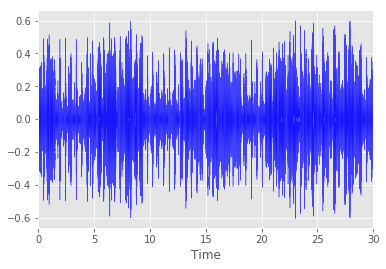

In [12]:
song, meta_data = sample_music(index = 800)
print("meta_data = ", meta_data)
print("Song :")
song

In [568]:
def plot_train_test_distribution(y_train_filt, y_test_filt, textn = 'filtered data') :

    mpl.style.use('ggplot')
    #fig = plt.figure()
    #ax = fig.add_axes([0,0,1,1])
    fig, ax = plt.subplots(figsize=(10,6))
    gclass = ['1', '2', '3', '4', '5', '6','7', '8', '9','10']
    offset = 1
    X = np.arange(len(gclass))* offset
    rt, counts_train_filt = np.unique(y_train_filt, return_counts = True)
    width = 0.25

    ax.bar(X + 0*width, counts_train_filt,  width = width,label='Train')

    rt, counts_train_strat = np.unique(y_test_filt, return_counts = True)
    ax.bar(X + width, counts_train_strat,  width = width,label='Test')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Number', color = "black", fontsize = 20)
    title_obj = ax.set_title('Genres distribution in ' + textn + ' data' )
    ax.set_xticks(X)
    print(gclass)
    ax.set_xticklabels(gclass, color = 'black', fontsize = 15)
    leg = ax.legend(loc='best', fontsize=11,  shadow=False, ncol=2, borderaxespad=0, frameon=False)
    #ax.legend(loc='upper center', fontsize=13, bbox_to_anchor=(0.5, -0.09),fancybox=True, shadow=True, ncol=3)
    #ax.legend(loc='best', fontsize=11,  shadow=False, borderaxespad=0, frameon=False)
    for text in leg.get_texts():
        plt.setp(text, color = 'black')
    plt.setp(title_obj, color='black')
    #plt.rcParams["figure.figsize"] = (20,10)    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Number', color = "black", fontsize = 20)
    title_obj = ax.set_title('Genres distribution in ' + textn + ' data' )
    ax.set_xticks(X)
    print(gclass)
    ax.set_xticklabels(gclass, color = 'black', fontsize = 15)
    leg = ax.legend(loc='best', fontsize=11,  shadow=False, ncol=2, borderaxespad=0, frameon=False)
    #ax.legend(loc='upper center', fontsize=13, bbox_to_anchor=(0.5, -0.09),fancybox=True, shadow=True, ncol=3)
    #ax.legend(loc='best', fontsize=11,  shadow=False, borderaxespad=0, frameon=False)
    for text in leg.get_texts():
        plt.setp(text, color = 'black')
    plt.setp(title_obj, color='black')
    #fig.tight_layout()
    save_file_name = 'genres_distribution_' + textn + '_data.png'
    plt.savefig(save_file_name)  
    

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']


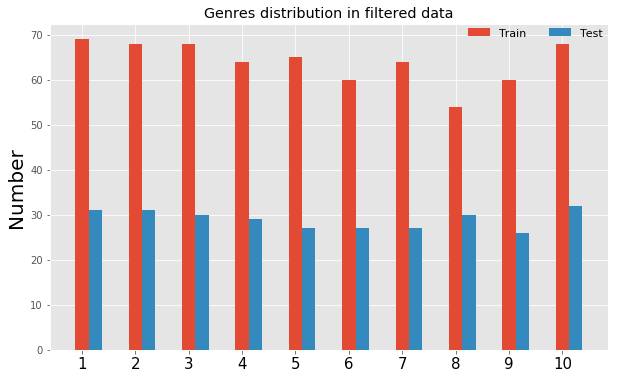

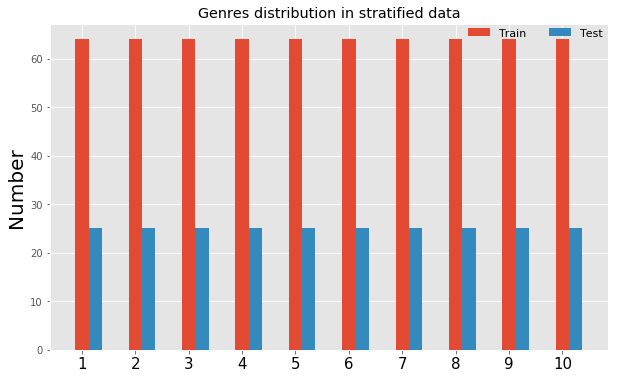

In [14]:
data,_ = read_data()
data_features, labels, labels_titles, data_frame_title = read_feats_tets(data)
labels = np.array(labels)

#TRAIN_INDICES_FILT, TEST_INDICES_FILT, VAL_INDICES_FILT = analyse_filtered_index_union_trainVal() 
#TRAIN_INDICES_STRAT, TEST_INDICES_STRAT, VAL_INDICES_STRAT = analyse_index_stratified_union_trainVal() 

TRAIN_INDICES_FILT, TEST_INDICES_FILT, VAL_INDICES_FILT = filtered_data() 
TRAIN_INDICES_STRAT, TEST_INDICES_STRAT, VAL_INDICES_STRAT = stratified_data() 

# Intersection between the two tests :
RESPONSE_TEST_INDICES = TEST_INDICES_FILT *  TEST_INDICES_STRAT
y_train_filt = labels[TRAIN_INDICES_FILT]
y_test_filt = labels[TEST_INDICES_FILT]
y_val_filt = labels[VAL_INDICES_FILT]
y_train_strat = labels[TRAIN_INDICES_STRAT]
y_test_strat = labels[TEST_INDICES_STRAT]
y_val_strat = labels[VAL_INDICES_STRAT]


#plot_train_test_val_distribution(y_train_filt, y_test_filt, y_val_filt, 'filtered')
plot_train_test_distribution(y_train_filt, y_test_filt, 'filtered')
plot_train_test_distribution(y_train_strat, y_test_strat, 'stratified')

In [569]:
def plot_distribution(y_labels, y_axis = 'Number', textn = 'test') :

    mpl.style.use('ggplot')
    #fig = plt.figure()
    #ax = fig.add_axes([0,0,1,1])
    fig, ax = plt.subplots(figsize=(10,6))
    gclass = ['1', '2', '3', '4', '5', '6','7', '8', '9','10']
    offset = 1
    X = np.arange(len(gclass))* offset
    rt, counts_train_filt = np.unique(y_labels, return_counts = True)
    width = 0.25
    #ax.bar(X + 0*width, counts_train_filt,  width = width,label='Final test data')
    
    
    ax.bar(X[0] + 0*width, counts_train_filt[0],  width = width, label='Blues')
    ax.bar(X[1] + 0*width, counts_train_filt[1],  width = width, label='classical')
    ax.bar(X[2] + 0*width, counts_train_filt[2],  width = width, label='country')
    ax.bar(X[3] + 0*width, counts_train_filt[3],  width = width, label='disco')
    ax.bar(X[4] + 0*width, counts_train_filt[4],  width = width, label='hiphop')
    ax.bar(X[5] + 0*width, counts_train_filt[5],  width = width, label='jazz')
    ax.bar(X[6] + 0*width, counts_train_filt[6],  width = width, label='metal')
    ax.bar(X[7] + 0*width, counts_train_filt[7],  width = width, label='pop')
    ax.bar(X[8] + 0*width, counts_train_filt[8],  width = width, label='reggae')
    ax.bar(X[9] + 0*width, counts_train_filt[9],  width = width, label='rock')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(y_axis, color = "black", fontsize = 20)
    title_obj = ax.set_title('Genres distribution in ' + textn + ' data' )
    ax.set_xticks(X)
    print(gclass)

    
    ax.set_xticklabels(gclass, color = 'black', fontsize = 15)
    leg = ax.legend(loc = 'best')
    #ax.legend(loc='upper center', fontsize=20, bbox_to_anchor=(1.065, 1.014),  shadow=False)
    ax.legend(loc='best', fontsize=11, ncol=2, shadow=False, borderaxespad=0, frameon=False)
    for text in leg.get_texts():
        plt.setp(text, color = 'black')
    plt.setp(title_obj, color='black')
    #plt.rcParams["figure.figsize"] = (20,10)
    #fig.tight_layout()
    save_file_name = 'genres_distribution_' + textn + '_data.png'
    plt.savefig(save_file_name)  
    

In [16]:
def plot_stackedBar(filtered, stratified, textn = '') :
    x_axis = np.arange(len(filtered))
    fig, ax = plt.subplots(figsize=(10,6))
    print("filtered = ",np.shape(filtered))
    print("stratified = ",np.shape(stratified))
    ax.bar(x_axis, stratified, color = "blue",label='Stratified', alpha=0.6)
    ax.bar(x_axis, filtered, color = "red", label='Filtered', alpha=0.7)
    
    ax.set_xlabel('Classifiers', color = "black", fontsize = 15)
    ax.set_ylabel('Accuracy ', color = "black", fontsize = 15)
    title_obj = ax.set_title('Model accuracy')
    ax.legend(loc = 'best')
    
    
    save_file_name = 'classifiers_accuracy_all_' + textn + 'data.png'
    plt.savefig(save_file_name)  

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']


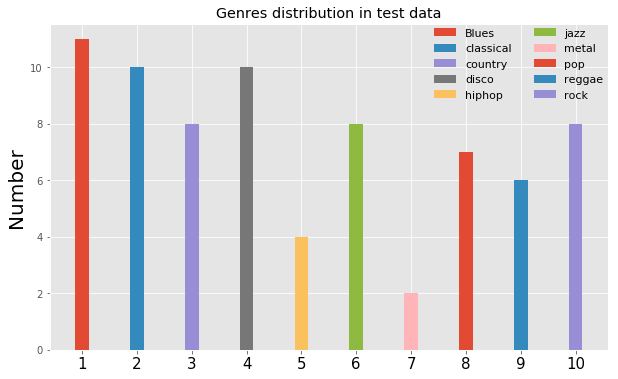

In [17]:
X_train_filt = data_features[TRAIN_INDICES_FILT]
y_train_filt = labels[TRAIN_INDICES_FILT]

X_train_strat = data_features[TRAIN_INDICES_STRAT]
y_train_strat = labels[TRAIN_INDICES_STRAT]

X_TEST  = data_features[RESPONSE_TEST_INDICES]
y_TEST  = labels[RESPONSE_TEST_INDICES]
plot_distribution(y_TEST, y_axis = 'Number', textn = 'test')

## Test Data

In [18]:
df_songs_test, df_songs_laTex = dataFrame_of_testData(show = False) 
df_songs_test
#print(df_songs_laTex)

Item  Index        File name                      Title
0    V1     12  blues.00012.wav           Cross Road Blues
1    V2     13  blues.00013.wav           Terraplane Blues
2    V3     15  blues.00015.wav              Walking blues
3    V4     20  blues.00020.wav            Preachin' Blues
4    V5     23  blues.00023.wav       Stones In My Passway
..  ...    ...              ...                        ...
69  V70    932   rock.00032.wav                All my love
70  V71    933   rock.00033.wav              Gimme Shelter
71  V72    939   rock.00039.wav  The Song Remains The Same
72  V73    942   rock.00042.wav               D'yer Mak'er
73  V74    947   rock.00047.wav            The Wanton Song

[74 rows x 4 columns]

In [19]:
df_clfs_accuracy = pd.read_csv("all_classifiers_accuracy.csv")
laTex = df_clfs_accuracy.to_latex(index=False, caption = "Classifiers' accuracy")
#print(df_clfs_accuracy)
print(laTex)

\begin{table}
\centering
\caption{Classifiers' accuracy}
\begin{tabular}{rlrr}
\toprule
 Index &        Classifiers &  Filtered data &  Stratified data \\
\midrule
     1 &               KNN1 &       0.459459 &         0.662162 \\
     2 &               KNN2 &       0.432432 &         0.702703 \\
     3 &               KNN3 &       0.418919 &         0.675676 \\
     4 &               KNN4 &       0.459459 &         0.702703 \\
     5 &               KNN5 &       0.432432 &         0.459459 \\
     6 &               KNN6 &       0.418919 &         0.472973 \\
     7 &               SVC1 &       0.554054 &         0.743243 \\
     8 &               SVC2 &       0.527027 &         0.756757 \\
     9 &               SVC3 &       0.459459 &         0.716216 \\
    10 &               SVC4 &       0.567568 &         0.770270 \\
    11 &               SVC5 &       0.148649 &         0.216216 \\
    12 &               SVC6 &       0.540541 &         0.716216 \\
    13 &         GaussProc1 &   

In [20]:
acc_filt = df_clfs_accuracy['Filtered data'].tolist()
acc_strat = df_clfs_accuracy['Stratified data'].tolist()

filtered =  (53,)
stratified =  (53,)


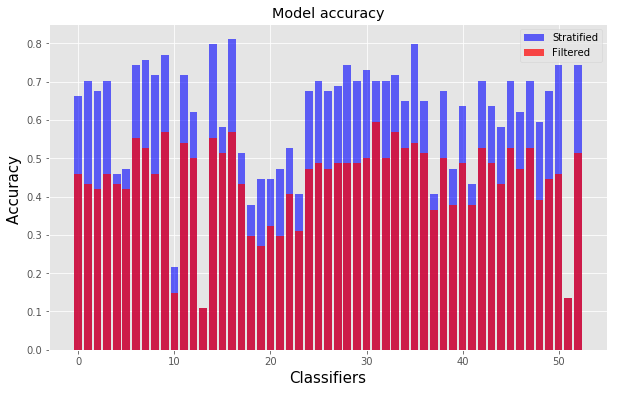

In [21]:
plot_stackedBar(acc_filt, acc_strat)

In [22]:
dt = np.dtype(int)
RESPONSE_TEST_INDICES = np.loadtxt('intersections.txt', dtype = dt)
ytest_labels = get_labels(RESPONSE_TEST_INDICES)
ytest_labels = np.array(ytest_labels)

In [23]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def theColors() :
    c = ['darkgrey',
    'tomato',
    'teal',
    'lime',
    'lightblue',
    'rebeccapurple',
    'red',
    'darkblue',
    'darkturquoise', 
    'black']
    return c


def plotbar_by_genres(x_axis, values, y_TEST_filt, cat = "filt") :

    np.random.RandomState(2**20 - 1)
    fig, ax = plt.subplots(1,1,figsize=(12,7))
    #= plt.subplots(x,y,figsize=(6,6))
    categories = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
    lescouleurs = []
    lasColores = theColors()

    for i in range(10) :
        np.random.RandomState(2**20 - 1)
        indicices = np.array([False]*len(y_TEST_filt))
        indicices[np.argwhere(y_TEST_filt==i).flatten()] = True

        ax.bar(x_axis[indicices], values[indicices], color = lasColores[i], label=categories[i] )
        
    ax.set_xlabel('Items', color = "black", fontsize = 15)
    ax.set_ylabel('Correct genres probability ', color = "black", fontsize = 15)
    #ax.legend(loc='best', fontsize=11, bbox_to_anchor=(1.00, 1.0),  shadow=False, borderaxespad=0, frameon=False)
    leg = ax.legend(loc = 'best')
    title_obj = ax.set_title('Frequency of correct responses by genres')
    plt.savefig("Frequency_of_correct_responses_by_genres_"+ str(cat) + ".png") 
    return lescouleurs

In [24]:
def countOccurences(uniques, counts, element) :
    try:
        index = uniques.index(element)
    except ValueError:
        return 0
    else:
        return counts[index]

def items_correct_frequency(irt_matrix_filt) :
    row, col = np.shape(irt_matrix_filt)
    occurences = []
    for k in range(col):
        uniques, counts = np.unique(irt_matrix_filt[:,k], return_counts=True)
        uniques = uniques.tolist()
        counts = counts.tolist()
        NumberOfOccurences = countOccurences(uniques, counts, 1)
        occurences.append(NumberOfOccurences)
    occurences = np.array(occurences)
    occurences_norm = occurences / row
    
    return occurences, occurences_norm

In [25]:
irt_matrix_filt = 'IRT_NORMAL_FILT.dat' 
irt_matrix_filt = np.loadtxt(irt_matrix_filt)
irt_matrix_filt = irt_matrix_filt.astype(int)

irt_matrix_strat = 'IRT_NORMAL_STRAT.dat'
irt_matrix_strat = np.loadtxt(irt_matrix_strat)
irt_matrix_strat = irt_matrix_strat.astype(int)

[]

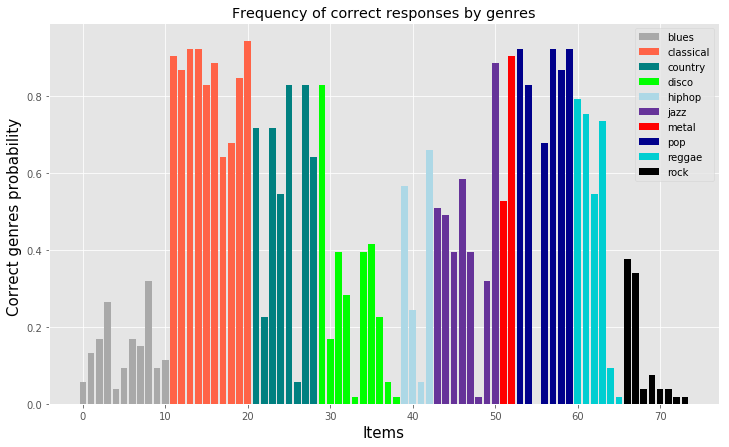

In [26]:
occurences, occurences_norm = items_correct_frequency(irt_matrix_filt)
x_axis = np.arange(len(occurences))
plotbar_by_genres(x_axis, occurences_norm, ytest_labels, "filt") 

[]

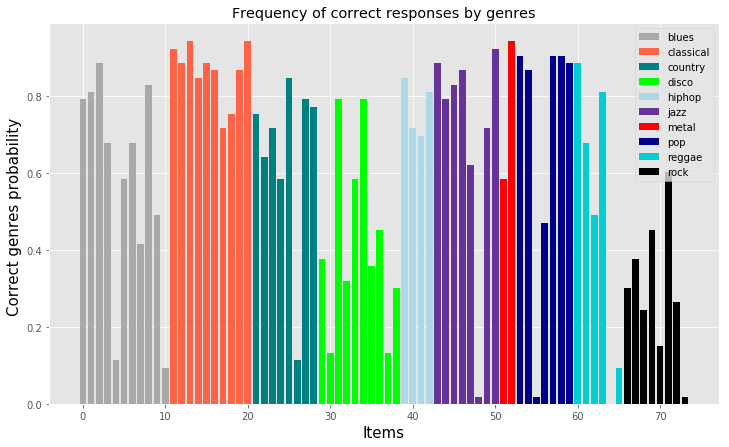

In [27]:
occurences, occurences_norm = items_correct_frequency(irt_matrix_strat)
x_axis = np.arange(len(occurences))
plotbar_by_genres(x_axis, occurences_norm, ytest_labels,  "strat") 

In [28]:
irt_matrix_filt

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
irt_matrix_strat

array([[1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 0]])

## IRT MODELS

In [12]:
# Model Rasch
dfNeg, dfNegLatex, songs, df_data = get_dataframe_of_items(indexModel = 0, capt = "" ) 
df_data
#print(df_data.to_latex(index=False, caption = "Rasch "))

RASCH_COMBINED_items_parameters.csv


Unnamed: 0        Title  Discrimination  Difficulty  Guessing
0          V1  blues.00012               1    0.263456         0
1          V2  blues.00013               1    0.411245         0
2          V3  blues.00014               1   -0.273187         0
3          V4  blues.00015               1    0.068328         0
4          V5  blues.00020               1    0.361784         0
..        ...          ...             ...         ...       ...
82        V83   rock.00032               1    2.537495         0
83        V84   rock.00033               1    1.703987         0
84        V85   rock.00039               1    0.978995         0
85        V86   rock.00042               1    3.810972         0
86        V87   rock.00047               1    4.547068         0

[87 rows x 5 columns]

In [13]:
# Model 1PL 
dfNeg, dfNegLatex, songs, df_data = get_dataframe_of_items(indexModel = 1, capt = "" ) 
df_data
#print(df_data.to_latex(index=False, caption = "Items' parameters for 1PL "))

1PL_COMBINED_items_parameters.csv


Unnamed: 0        Title  Discrimination  Difficulty  Guessing
0          V1  blues.00012        1.214727    0.103665         0
1          V2  blues.00013        1.214727    0.225413         0
2          V3  blues.00014        1.214727   -0.338202         0
3          V4  blues.00015        1.214727   -0.056866         0
4          V5  blues.00020        1.214727    0.184764         0
..        ...          ...             ...         ...       ...
82        V83   rock.00032        1.214727    1.975548         0
83        V84   rock.00033        1.214727    1.289816         0
84        V85   rock.00039        1.214727    0.692607         0
85        V86   rock.00042        1.214727    3.024364         0
86        V87   rock.00047        1.214727    3.628506         0

[87 rows x 5 columns]

In [50]:
# Model 2PL
dfNeg, dfNegLatex, songs, df_data = get_dataframe_of_items(indexModel = 2, capt = "" ) 
df_data
print(df_data.to_latex(index=False, caption = "Items' parameters 2PL "))

2PL_COMBINED_items_parameters.csv
\begin{table}
\centering
\caption{Items' parameters 2PL }
\begin{tabular}{llrrr}
\toprule
Unnamed: 0 &            Title &  Discrimination &  Difficulty &  Guessing \\
\midrule
        V1 &      blues.00012 &        2.751757 &    0.023687 &         0 \\
        V2 &      blues.00013 &        3.904016 &    0.054016 &         0 \\
        V3 &      blues.00014 &        1.732230 &   -0.268891 &         0 \\
        V4 &      blues.00015 &        1.935411 &   -0.048639 &         0 \\
        V5 &      blues.00020 &        2.436815 &    0.107072 &         0 \\
        V6 &      blues.00023 &        1.463342 &    1.930583 &         0 \\
        V7 &      blues.00024 &        2.526736 &    0.301117 &         0 \\
        V8 &      blues.00025 &        3.234947 &    0.363232 &         0 \\
        V9 &      blues.00028 &        3.041187 &    0.162618 &         0 \\
       V10 &      blues.00062 &        2.488814 &   -0.079962 &         0 \\
       V11 &      bl

In [14]:
# Model 3PL
dfNeg, dfNegLatex, songs, df_data = get_dataframe_of_items(indexModel = 3, capt = "" ) 
df_data
print(df_data.to_latex(index=False, caption = "Items' parameters 3PL "))

3PL_COMBINED_items_parameters.csv
\begin{table}
\centering
\caption{Items' parameters 3PL }
\begin{tabular}{llrrr}
\toprule
Unnamed: 0 &            Title &  Discrimination &  Difficulty &  Guessing \\
\midrule
        V1 &      blues.00012 &       43.058144 &    0.308324 &  0.133681 \\
        V2 &      blues.00013 &       42.862968 &    0.309810 &  0.089057 \\
        V3 &      blues.00014 &       31.209691 &    0.435434 &  0.327688 \\
        V4 &      blues.00015 &       42.505272 &    0.308972 &  0.193448 \\
        V5 &      blues.00020 &       16.075468 &    0.419825 &  0.137061 \\
        V6 &      blues.00023 &        2.011171 &    1.520201 &  0.015806 \\
        V7 &      blues.00024 &       27.566979 &    0.527905 &  0.086698 \\
        V8 &      blues.00025 &       28.027174 &    0.526019 &  0.043108 \\
        V9 &      blues.00028 &        4.942077 &    0.301133 &  0.026030 \\
       V10 &      blues.00062 &       14.811357 &    0.381168 &  0.209629 \\
       V11 &      bl

In [52]:
# Model 3PL
dfNeg, dfNegLatex, songs, df_data = get_dataframe_of_items(indexModel = 4, capt = "" ) 
df_data
print(df_data.to_latex(index=False, caption = "Items' parameters for 3PL guessing "))

3PL_COMBINED_GUESS_items_parameters.csv
\begin{table}
\centering
\caption{Items' parameters for 3PL guessing }
\begin{tabular}{llrrr}
\toprule
Unnamed: 0 &            Title &  Discrimination &  Difficulty &  Guessing \\
\midrule
        V1 &      blues.00012 &       63.898030 &    0.305950 &  0.134224 \\
        V2 &      blues.00013 &       61.521002 &    0.308120 &  0.089470 \\
        V3 &      blues.00014 &       44.646476 &    0.429425 &  0.328306 \\
        V4 &      blues.00015 &       63.225123 &    0.306023 &  0.193928 \\
        V5 &      blues.00020 &       16.336474 &    0.420080 &  0.137083 \\
        V6 &      blues.00023 &        2.356907 &    1.384262 &  0.016525 \\
        V7 &      blues.00024 &       41.361694 &    0.548271 &  0.085932 \\
        V8 &      blues.00025 &       41.856873 &    0.547038 &  0.043099 \\
        V9 &      blues.00028 &        5.250493 &    0.308984 &  0.026258 \\
       V10 &      blues.00062 &       14.991943 &    0.382659 &  0.209680 \\
 

In [53]:
df_clfs_accuracy = pd.read_csv("all_classifiers_accuracy.csv")
df_clfs_accuracy

Index        Classifiers  Filtered data  Stratified data
0       1               KNN1       0.425287         0.689655
1       2               KNN2       0.471264         0.643678
2       3               KNN3       0.413793         0.620690
3       4               KNN4       0.425287         0.678161
4       5               KNN5       0.333333         0.390805
5       6               KNN6       0.356322         0.436782
6       7               SVC1       0.482759         0.747126
7       8               SVC2       0.517241         0.724138
8       9               SVC3       0.482759         0.655172
9      10               SVC4       0.528736         0.747126
10     11               SVC5       0.137931         0.103448
11     12               SVC6       0.528736         0.689655
12     13         GaussProc1       0.459770         0.540230
13     14         GaussProc2       0.471264         0.666667
14     15         GaussProc3       0.540230         0.724138
15     16         GaussProc4       0.482759         0.689655
16     17         GaussProc5       0.528736         0.735632
17     18         GaussProc6       0.287356         0.310345
18     19           DecTree1       0.275862         0.425287
19     20           DecTree2       0.321839         0.425287
20     21           DecTree3       0.356322         0.436782
21     22           DecTree4       0.413793         0.379310
22     23           DecTree5       0.402299         0.321839
23     24           DecTree6       0.264368         0.402299
24     25        RandForest1       0.459770         0.643678
25     26        RandForest2       0.471264         0.678161
26     27        RandForest3       0.459770         0.655172
27     28        RandForest4       0.459770         0.655172
28     29        RandForest5       0.459770         0.678161
29     30        RandForest6       0.471264         0.678161
30     31               MLP1       0.517241         0.735632
31     32               MLP2       0.517241         0.735632
32     33               MLP3       0.482759         0.712644
33     34               MLP4       0.528736         0.735632
34     35               MLP5       0.517241         0.678161
35     36               MLP6       0.540230         0.747126
36     37          Adaboost1       0.459770         0.609195
37     38          Adaboost2       0.344828         0.356322
38     39          Adaboost3       0.494253         0.574713
39     40          Adaboost4       0.298851         0.402299
40     41          Adaboost5       0.505747         0.551724
41     42          Adaboost6       0.425287         0.436782
42     43      LogisticRegr1       0.448276         0.563218
43     44      LogisticRegr2       0.459770         0.620690
44     45      LogisticRegr3       0.482759         0.643678
45     46      LogisticRegr4       0.517241         0.678161
46     47      LogisticRegr5       0.505747         0.701149
47     48      LogisticRegr6       0.528736         0.712644
48     49         NaiveBayes       0.436782         0.643678
49     50         ExtraTree1       0.436782         0.666667
50     51         ExtraTree2       0.482759         0.655172
51     52    DummyClassifier       0.149425         0.137931
52     53  Voting Hard (SVC)       0.528736         0.701149

In [54]:
print(df_clfs_accuracy.to_latex(index=False, caption = "classifiers' accuracy "))

\begin{table}
\centering
\caption{classifiers' accuracy }
\begin{tabular}{rlrr}
\toprule
 Index &        Classifiers &  Filtered data &  Stratified data \\
\midrule
     1 &               KNN1 &       0.425287 &         0.689655 \\
     2 &               KNN2 &       0.471264 &         0.643678 \\
     3 &               KNN3 &       0.413793 &         0.620690 \\
     4 &               KNN4 &       0.425287 &         0.678161 \\
     5 &               KNN5 &       0.333333 &         0.390805 \\
     6 &               KNN6 &       0.356322 &         0.436782 \\
     7 &               SVC1 &       0.482759 &         0.747126 \\
     8 &               SVC2 &       0.517241 &         0.724138 \\
     9 &               SVC3 &       0.482759 &         0.655172 \\
    10 &               SVC4 &       0.528736 &         0.747126 \\
    11 &               SVC5 &       0.137931 &         0.103448 \\
    12 &               SVC6 &       0.528736 &         0.689655 \\
    13 &         GaussProc1 &  

In [55]:
clfs_abilities_combined, clf_names = get_abilities_files()
df_combined = create_tables_classifiers_abilities(clfs_abilities_combined, clf_names)
df_combined

clfs_abilities_filtered =  ['RASCH_COMBINED_clfs_parameters.csv', '1PL_COMBINED_clfs_parameters.csv', '2PL_COMBINED_clfs_parameters.csv', '3PL_COMBINED_clfs_parameters.csv', '3PL_COMBINED_GUESS_clfs_parameters.csv']
values =  (106,)
values =  (106,)
values =  (106,)
values =  (106,)
values =  (106,)


Classifiers     Rasch       1PL  \
KNN1[filtered]                    KNN1[filtered] -0.678204 -0.665602   
KNN2[filtered]                    KNN2[filtered] -0.338741 -0.386897   
KNN3[filtered]                    KNN3[filtered] -0.763155 -0.735355   
KNN4[filtered]                    KNN4[filtered] -0.678204 -0.665602   
KNN5[filtered]                    KNN5[filtered] -1.365091 -1.229581   
...                                          ...       ...       ...   
NaiveBayes[stratified]    NaiveBayes[stratified]  0.987510  0.702777   
ExtraTree1[stratified]    ExtraTree1[stratified]  1.178316  0.859924   
ExtraTree2[stratified]    ExtraTree2[stratified]  1.082334  0.780898   
Dummy[stratified]              Dummy[stratified] -3.017667 -2.579569   
Voting(SVC)[stratified]  Voting(SVC)[stratified]  1.473820  1.103324   

                              2PL       3PL      3PLg  
KNN1[filtered]          -0.639151 -0.461483 -0.446865  
KNN2[filtered]          -0.528308 -0.327396 -0.295583  
KNN3[filtered]          -0.621090 -0.838915 -0.793921  
KNN4[filtered]          -0.693696 -0.760888 -0.721349  
KNN5[filtered]          -1.105535 -1.330730 -1.285732  
...                           ...       ...       ...  
NaiveBayes[stratified]   0.791162  0.730790  0.702171  
ExtraTree1[stratified]   0.997220  0.703594  0.695577  
ExtraTree2[stratified]   0.988123  0.740559  0.715115  
Dummy[stratified]       -1.841616 -2.908898 -2.811584  
Voting(SVC)[stratified]  1.523966  0.926324  0.852834  

[106 rows x 6 columns]

In [56]:
df_combined_zip = zip_dataframe_rows(df_combined,  index = 53)
df_combined_zip

Classifiers     Rasch       1PL  \
KNN1[filtered]                    KNN1[filtered] -0.678204 -0.665602   
KNN1[stratified]                KNN1[stratified]  1.373999  1.021090   
KNN2[filtered]                    KNN2[filtered] -0.338741 -0.386897   
KNN2[stratified]                KNN2[stratified]  0.987510  0.702777   
KNN3[filtered]                    KNN3[filtered] -0.763155 -0.735355   
...                                          ...       ...       ...   
ExtraTree2[stratified]    ExtraTree2[stratified]  1.082334  0.780898   
Dummy[filtered]                  Dummy[filtered] -2.903820 -2.487238   
Dummy[stratified]              Dummy[stratified] -3.017667 -2.579569   
Voting(SVC)[filtered]      Voting(SVC)[filtered]  0.089250 -0.035504   
Voting(SVC)[stratified]  Voting(SVC)[stratified]  1.473820  1.103324   

                              2PL       3PL      3PLg  
KNN1[filtered]          -0.639151 -0.461483 -0.446865  
KNN1[stratified]         0.787382  0.696897  0.697589  
KNN2[filtered]          -0.528308 -0.327396 -0.295583  
KNN2[stratified]         0.596625  0.598329  0.600436  
KNN3[filtered]          -0.621090 -0.838915 -0.793921  
...                           ...       ...       ...  
ExtraTree2[stratified]   0.988123  0.740559  0.715115  
Dummy[filtered]         -1.863571 -2.713462 -3.068480  
Dummy[stratified]       -1.841616 -2.908898 -2.811584  
Voting(SVC)[filtered]   -0.064808  0.181163  0.187750  
Voting(SVC)[stratified]  1.523966  0.926324  0.852834  

[106 rows x 6 columns]

In [58]:
print(df_combined_zip.to_latex(index=False, caption = "classifiers' abilities "))

\begin{table}
\centering
\caption{classifiers' abilities }
\begin{tabular}{lrrrrr}
\toprule
               Classifiers &     Rasch &       1PL &       2PL &       3PL &      3PLg \\
\midrule
            KNN1[filtered] & -0.678204 & -0.665602 & -0.639151 & -0.461483 & -0.446865 \\
          KNN1[stratified] &  1.373999 &  1.021090 &  0.787382 &  0.696897 &  0.697589 \\
            KNN2[filtered] & -0.338741 & -0.386897 & -0.528308 & -0.327396 & -0.295583 \\
          KNN2[stratified] &  0.987510 &  0.702777 &  0.596625 &  0.598329 &  0.600436 \\
            KNN3[filtered] & -0.763155 & -0.735355 & -0.621090 & -0.838915 & -0.793921 \\
          KNN3[stratified] &  0.801098 &  0.549443 &  0.493052 &  0.634328 &  0.625027 \\
            KNN4[filtered] & -0.678204 & -0.665602 & -0.693696 & -0.760888 & -0.721349 \\
          KNN4[stratified] &  1.275518 &  0.939973 &  0.887126 &  0.731913 &  0.724721 \\
            KNN5[filtered] & -1.365091 & -1.229581 & -1.105535 & -1.330730 & -1.285732 \\

## Correlation

Correlation

Analysis of Correlation between different models


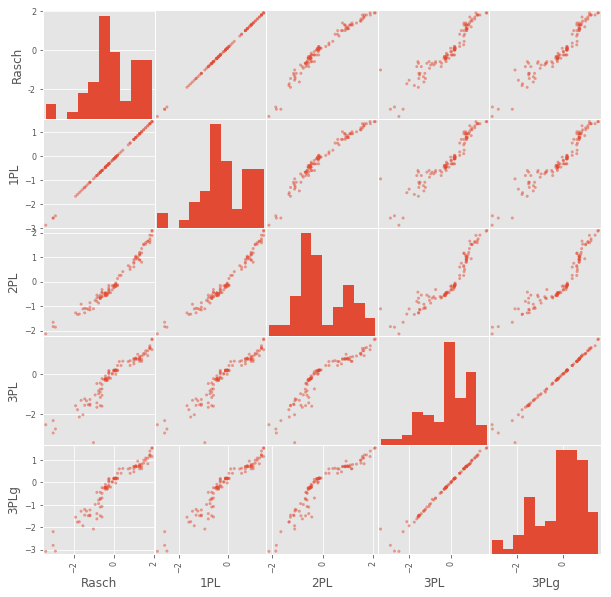

In [59]:
scatter_matrix(df_combined, figsize=(10,10))
save_file_name = 'IRT_correlation_all_models.png'
plt.savefig(save_file_name)  

In [60]:
#data1 = list(df_combined[models_name[0]])
#data2 = list(df_combined[models_name[4]])
#models_name = ['Rasch', '1PL', '2PL', '3PL', '3PLg']
retn = df_combined.corr(method='pearson')
retn


Rasch       1PL       2PL       3PL      3PLg
Rasch  1.000000  0.999998  0.971344  0.934790  0.952638
1PL    0.999998  1.000000  0.971662  0.934796  0.952536
2PL    0.971344  0.971662  1.000000  0.907150  0.913030
3PL    0.934790  0.934796  0.907150  1.000000  0.989948
3PLg   0.952638  0.952536  0.913030  0.989948  1.000000

In [63]:
def plot_stackedBar(values, valx) :
    
    x_axis = np.arange(len(values))
    fig, ax = plt.subplots()
    ax.bar(x_axis, values, label='Filtered')
    ax.bar(x_axis, valx, bottom=values,label='Stratified')
    ax.set_xlabel('Items', color = "black", fontsize = 15)
    ax.set_ylabel('Accuracy ', color = "black", fontsize = 15)
    title_obj = ax.set_title('Model accuracy')
    leg = ax.legend(loc = 'best')

In [93]:
def plot_stackedBarTransparent(values, valx) :
    
    x_axis = np.arange(len(values))
    fig, ax = plt.subplots()
    ax.bar(x_axis, valx, color = 'red', label='Stratified', alpha=0.6)
    ax.bar(x_axis, values,color = 'blue', label='Filtered', alpha=0.7)
    ax.set_xlabel('Items', color = "black", fontsize = 15)
    ax.set_ylabel('Accuracy ', color = "black", fontsize = 15)
    title_obj = ax.set_title('Model accuracy')
    leg = ax.legend(loc = 'best')

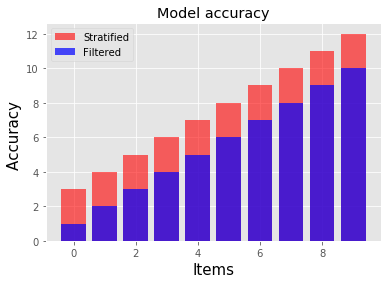

In [94]:
val = np.arange(10)+1
plot_stackedBarTransparent(val, val +2)

In [600]:
def get_test_with_negDiscriminant(data, indexModel = 2):

    dt = np.dtype(int)
    RESPONSE_TEST_INDICES = np.loadtxt('intersections.txt', dtype = dt)
    data = np.array(data)
    tests_songs_names = data[RESPONSE_TEST_INDICES]
    songs_indices = np.array(np.arange(1000))
    songs_indices = songs_indices[RESPONSE_TEST_INDICES]
    items_parameters = get_items_parameters_files()
    fil = items_parameters[indexModel]
    df_data = pd.read_csv(fil)
    songs_names_simplified = [expri[expri.find('\\')+1:].replace('.wav', '') for expri in tests_songs_names]
    #print(songs_names_simplified)
    #df_data.insert(1, "Song", tests_songs_names )
    df_data.insert(1, "Song", songs_names_simplified )
    df_data.insert(1, "Index", songs_indices )
    ##
    neg_disc = df_data['Discrimination'] < 0
    df_data_neg = df_data[neg_disc]
    
    return df_data_neg,  RESPONSE_TEST_INDICES

In [440]:
def item_characteristic_curve(a,b,c = 0) :
    
    #theta = np.arange(-6,7,1)
    theta = np.linspace(-6,6,150)
    L = a*(theta - b)
    expnl = 1 + np.exp(-L)
    P = c + (1 - c) / expnl
    
    return theta, P
    

In [441]:
indexModel = 2
items_parameters = get_items_parameters_files()
fil = items_parameters[indexModel]
print(fil)
df_data = pd.read_csv(fil)

2PL_COMBINED_items_parameters.csv


In [442]:
df_data

Unnamed: 0  Discrimination  Difficulty  Guessing
0          V1        1.835191    0.069489         0
1          V2        1.859835   -0.103023         0
2          V3        1.756419   -0.290678         0
3          V4        0.962188    0.009934         0
4          V5       -0.240784  -10.593972         0
..        ...             ...         ...       ...
69        V70        0.856909    1.281789         0
70        V71       -0.121095  -18.814481         0
71        V72        1.219407    0.669168         0
72        V73        0.700547    2.747219         0
73        V74      -22.011629   -1.821236         0

[74 rows x 4 columns]

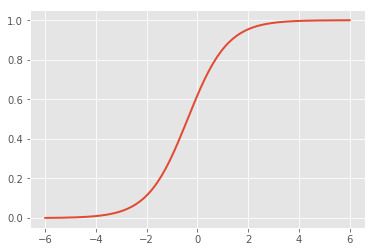

In [526]:
a = 1.27 
b= -0.39
theta, P = item_characteristic_curve(a,b)
plt.plot(theta, P)

In [535]:
def plot_icc_item(theta, P, framON = False, save_file_name = 'icc_plots_TEST_XXXTRYX.png'):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(theta, P, label = 'ICC')
    title_obj = ax.set_title("Item ICC")
    ax.set_xlabel(r'$\theta$', fontsize = 20)
    ax.set_ylabel('P',  rotation='vertical', fontsize = 20)
    leg = ax.legend(loc='best', fontsize=11,  shadow=False, ncol=2, borderaxespad=0, frameon=False)
    if not framON : 
        ax.set_frame_on(False)
    
    plt.savefig(save_file_name) 
    return 0

0

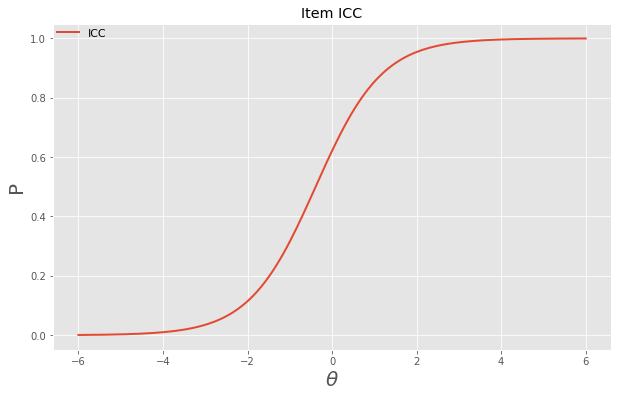

In [536]:
plot_icc_item(theta, P, framON = True, save_file_name = 'icc_plots_TEST_XXXTRYX.png')

In [606]:
def get_models_parameters(model = 'Rasch') :
      
    switcher={
        'Rasch' : 0,
        '1PL' : 1,
        '2PL': 2,
        '3PL': 3,
        }

    index = switcher.get(model,0)
    
    items_parameters = get_items_parameters_files()
    df_data = pd.read_csv(items_parameters[index])

    if "Guessing" not in df_data.columns :
        row, col = df_data.shape
        guess_param = [0]*row
        df_data.insert(col, "Guessing", guess_param )

    base = df_data.loc[:, ['Discrimination','Difficulty','Guessing']].to_numpy()
    a = base[:,0]
    b = base[:,1]
    c = base[:,2]
    
    return a, b, c

In [1320]:
class items_characteristic_plots :
    def __init__(self, a,b,c):
        self.a = a
        self.b = b
        self.c = c
        self.negIndices = np.argwhere(a < 0).flatten()
        print("self.negIndices =  ", self.negIndices)
        # Labels for all the test items if any 
        self.RESPONSE_TEST_INDICES = np.loadtxt('intersections.txt', dtype = np.dtype(int))
        ytest_labels = self.get_labels(self.RESPONSE_TEST_INDICES)
        self.ytest_labels = np.array(ytest_labels)
        
    def item_characteristic_curve(self, a,b,c = 0) :

        #theta = np.arange(-6,7,1)
        theta = np.linspace(-6,6,200)
        L = a*(theta - b)
        expnl = 1 + np.exp(-L)
        P = c + (1 - c) / expnl

        return theta, P
    
    def plot_icc_item(self, index = 0, framON = False, save_file_name = 'icc_plots_TEST_XXXTRYX.png'):
        fig, ax = plt.subplots(figsize=(10,6))
        theta, P = self.item_characteristic_curve(self.a[index], self.b[index], self.c[index])
        ax.plot(theta, P, label = 'ICC')
        title_obj = ax.set_title("Item " + str(index + 1)+ " ICC")
        ax.set_xlabel(r'$\theta$', fontsize = 20)
        ax.set_ylabel('P',  rotation='vertical', fontsize = 20)
        leg = ax.legend(loc='best', fontsize=11,  shadow=False, ncol=2, borderaxespad=0, frameon=False)
        if not framON : 
            ax.set_frame_on(False)

        plt.savefig(save_file_name) 
        return 0
    
    def get_theta_and_probabilities_negatives(self) :
        """
        Append all the ICCs for each item (a_i,b_i, c_i) with 
        negative discriminant and return thetas and probabilities
        """
        thetas = []
        probabilities = []
        for i in self.negIndices :
            theta, P = item_characteristic_curve(a[i],b[i],c[i])
            thetas.append(theta)
            probabilities.append(P)
        return thetas, probabilities
    
    def get_theta_and_probabilities_all(self) :
        """
        Append all the ICCs for each item (a_i,b_i, c_i) with 
        negative discriminant and return thetas and probabilities
        """
        thetas = []
        probabilities = []
        for i in range(len(self.a)) :
            theta, P = item_characteristic_curve(self.a[i], self.b[i], self.c[i])
            thetas.append(theta)
            probabilities.append(P)
        return thetas, probabilities

    def icc_plots_all_items_in_genres(self, song_genre = 0, save_file_name = 'icc_plots_TEST_XXXXXYX.png'):
        import matplotlib.pyplot as plt 
        combined_thetas, combined_probs, indexes = self.test_infos_all_items_in_genres()
        theta = combined_thetas[song_genre]
        P = combined_probs[song_genre]
        indexes = indexes[song_genre]
        
        number_items = len(theta)
        y = 5
        x = math.ceil(number_items/y)
        if x == 1 :
            y = number_items
        print(x,y)

        count = 0
        line_labels = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
        genres_colors = theColors()

        figures_legends = []
        fig = plt.figure(figsize=(15,5))
        fig.subplots_adjust(hspace=0.45, wspace=0.3)

        for i in range(1, len(theta) + 1) :
                ax = fig.add_subplot(x, y, i)
                l_plot = ax.plot(theta[count], P[count], color = genres_colors[song_genre])
                figures_legends = l_plot[0]

                title_obj = ax.set_title('V' + str(indexes[i-1]), fontsize = 11, color = 'black')
                ax.set_frame_on(False)
                # Upgrade count
                count = count + 1

        # Create the legend
        fig.legend(handles = [figures_legends],     # The line objects
                       labels=[line_labels[song_genre]],   # The labels for each line
                       loc="center right",   # Position of legend
                       borderaxespad=0,
                       frameon=False,
                       title="Items genres"  # Title for the legend
                       )

        fig.suptitle("Items trace lines", fontsize = 20)
        fig.text(0.5, 0.04, r'$\theta$', ha='center', fontsize = 20)
        fig.text(0.04, 0.5, 'P', va='center', rotation='vertical', fontsize = 20)
        plt.savefig(save_file_name)  

    def test_infos_all_items_in_genres(self) :
        
        y_TEST_filt = self.ytest_labels
        thetas, probs = self.get_theta_and_probabilities_all()

        thetas = np.array(thetas)
        probs = np.array(probs)
        categories = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
        combined_thetas = []
        combined_probs = []
        indexes = []
        for i in range(len(categories)) :
            indicices = np.array([False]*len(y_TEST_filt))
            indicices[np.argwhere(y_TEST_filt==i).flatten()] = True
            #print(np.argwhere(indicices==True).flatten())
            indexes.append(np.argwhere(indicices==True).flatten())
            abilities = thetas[indicices]
            levels = probs[indicices]
            combined_thetas.append(abilities)
            combined_probs.append(levels)

        return combined_thetas, combined_probs, indexes

    def icc_plots_only_negative_items(self, x = 3, y = 3, save_file_name = 'icc_plots_TEST_NegXXX.png'):

        import matplotlib.pyplot as plt 
        # Read the thetas and probbilities of all neg. items 
        theta, P = self.get_theta_and_probabilities_negatives()
        # Read the labels of the test items (total = 74)
        ytest_labels = self.get_labels(self.RESPONSE_TEST_INDICES)
        ytest_labels = np.array(ytest_labels)
        ytest_labels = ytest_labels[self.negIndices]
        #print("ytest_labels = ", ytest_labels)
        
        line_labels = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
        #print("line_labels 1 = ", line_labels)
        #line_labels = [line_labels[i] for i in ytest_labels]
        #print("line_labels 2 = ", line_labels)
        genres_colors = self.theColors()
        a = np.array(ytest_labels)
        genres_labels, genres_indices = np.unique(a, return_index=True)
        figures_legends = []
        line_labels = [line_labels[i] for i in genres_labels]
        #print("line_labels 2 = ", line_labels)
        
        
        # plot items 
        count = 0
        total = len(theta)

        fig = plt.figure(figsize=(16,6))
        fig.subplots_adjust(hspace=1.5, wspace=0.3)
        for i in range(1, len(theta) + 1) :
            ax = fig.add_subplot(x, y, i)
            l_plot = ax.plot(theta[count], P[count], color = genres_colors[ytest_labels[i-1]])
            # Save some plots for the legends 
            if i-1 in genres_indices : 
                figures_legends.append(l_plot[0])


            #ax.plot(theta[count], P[count])
            title_obj = ax.set_title('V' + str(self.negIndices[count] + 1), fontsize = 10)
            ax.set_frame_on(False)
            # Upgrade count
            count = count + 1
        #print("len(figures_legends) = ", len(figures_legends))
        # Create the legend
        # ax.legend(loc='best', fontsize=11, ncol=2, shadow=False, borderaxespad=0, frameon=False)
        fig.legend(handles = figures_legends,     # The line objects
                       labels=line_labels,   # The labels for each line
                       loc="center right",   # Position of legend
                       borderaxespad=0,
                       frameon=False,
                       title="Items genres"  # Title for the legend
                       )

        fig.suptitle("Items trace lines", fontsize = 20)
        fig.text(0.5, 0.01, r'$\theta$', ha='center', fontsize = 20)
        fig.text(0.08, 0.5, 'P', va='center', rotation='vertical', fontsize = 20)
        
        # Save fig. 
        plt.savefig(save_file_name) 
        
    def get_labels(self, list_test) :
        test_labels = []
        for index in list_test : 
            test_labl = math.floor(index / 100)
            test_labels.append(test_labl)

        return test_labels

    def theColors(self) :
        c = ['darkgrey',
        'tomato',
        'teal',
        'lime',
        'lightblue',
        'rebeccapurple',
        'red',
        'darkblue',
        'darkturquoise', 
        'black']
        return c
    
    def icc_plots_by_genres_negative_items(self,x = 8, y = 10, save_file_name = 'icc_plots_TEST_XXXXXYX.png'):

        import matplotlib.pyplot as plt 
        # Read the thetas and probbilities of all neg. items 
        theta, P = self.get_theta_and_probabilities_all()
        print("len(theta) = ", len(theta))

        # Read the labels of the test items (total = 74)
        ytest_labels = self.get_labels(self.RESPONSE_TEST_INDICES)
        ytest_labels = np.array(ytest_labels)

        count = 0
        total = len(theta)
        y_axis_values = np.arange(0,total-10,10)
        plt.rc('lines', lw=2, c='r')

        # For plotting the legends (Optional)
        line_labels = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
        genres_colors = self.theColors()
        a = np.array(ytest_labels)
        genres_labels, genres_indices = np.unique(a, return_index=True)
        figures_legends = []


        fig = plt.figure(figsize=(11,7))
        fig.subplots_adjust(hspace=1.0, wspace=0.3)
        for i in range(1, len(theta) + 1) :

                ax = fig.add_subplot(x, y, i)
                l_plot = ax.plot(theta[count], P[count], color = genres_colors[ytest_labels[i-1]])
                # Save some plots for the legends 
                if i-1 in genres_indices : 
                    figures_legends.append(l_plot[0])

                # Check if the current plot is a negative discriminant item 
                # if so change the the plot's title to 'VX(-)', where X is the
                # plots number 
                if i-1 in self.negIndices :
                    title_obj = ax.set_title('V' + str(count + 1) + '(-)', fontsize = 11, color = 'blue')
                else :
                    title_obj = ax.set_title('V' + str(count + 1), fontsize = 11, color = 'black')

                # Show the axis only on one side 
                show_y_axis = len(y_axis_values[np.isin(y_axis_values, count)]) == 1
                if count < (total - (total % 10) ) and not show_y_axis :
                    ax.set_axis_off()
                elif show_y_axis :
                    #print(i)
                    ax.set_frame_on(False)
                    ax.axes.get_xaxis().set_visible(False)
                else :
                    ax.set_frame_on(False)
                    ax.axes.get_yaxis().set_visible(False)

                # Upgrade count
                count = count + 1

        # Create the legend
        # ax.legend(loc='best', fontsize=11, ncol=2, shadow=False, borderaxespad=0, frameon=False)
        fig.legend(handles = figures_legends,     # The line objects
                       labels=line_labels,   # The labels for each line
                       loc="center right",   # Position of legend
                       borderaxespad=0,
                       frameon=False,
                       title="Items genres"  # Title for the legend
                       )

        fig.suptitle("Items trace lines", fontsize = 20)
        fig.text(0.5, 0.04, r'$\theta$', ha='center', fontsize = 20)
        fig.text(0.04, 0.5, 'P', va='center', rotation='vertical', fontsize = 20)
        plt.savefig(save_file_name)  
        
        
        
    def icc_plots_by_genres(self,x = 8, y = 10, save_file_name = 'icc_plots_TEST_TOEXYX.png'):

        import matplotlib.pyplot as plt 
        # Read the thetas and probbilities of all neg. items 
        theta, P = self.get_theta_and_probabilities_all()

        # Read the labels of the test items (total = 74)
        ytest_labels = self.get_labels(self.RESPONSE_TEST_INDICES)
        ytest_labels = np.array(ytest_labels)

        count = 0
        total = len(theta)
        y_axis_values = np.arange(0,total-10,10)

        # For plotting the legends (Optional)
        line_labels = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
        genres_colors = self.theColors()
        a = np.array(ytest_labels)
        genres_labels, genres_indices = np.unique(a, return_index=True)
        figures_legends = []


        fig = plt.figure(figsize=(11,7))
        fig.subplots_adjust(hspace=1.0, wspace=0.3)
        for i in range(1, len(theta) + 1) :

                ax = fig.add_subplot(x, y, i)
                l_plot = ax.plot(theta[count], P[count], color = genres_colors[ytest_labels[i-1]])
                # Save some plots for the legends 
                if i-1 in genres_indices : 
                    figures_legends.append(l_plot[0])

                # plots number 
                title_obj = ax.set_title('V' + str(count + 1), fontsize = 11, color = 'black')

                # Show the axis only on one side 
                show_y_axis = len(y_axis_values[np.isin(y_axis_values, count)]) == 1
                if count < (total - (total % 10) ) and not show_y_axis :
                    ax.set_axis_off()
                elif show_y_axis :
                    #print(i)
                    ax.set_frame_on(False)
                    ax.axes.get_xaxis().set_visible(False)
                else :
                    ax.set_frame_on(False)
                    ax.axes.get_yaxis().set_visible(False)

                # Upgrade count
                count = count + 1

        # Create the legend
        # ax.legend(loc='best', fontsize=11, ncol=2, shadow=False, borderaxespad=0, frameon=False)
        fig.legend(handles = figures_legends,     # The line objects
                       labels=line_labels,   # The labels for each line
                       loc="center right",   # Position of legend
                       borderaxespad=0,
                       frameon=False,
                       title="Items genres"  # Title for the legend
                       )

        fig.suptitle("Items trace lines", fontsize = 20)
        fig.text(0.5, 0.04, r'$\theta$', ha='center', fontsize = 20)
        fig.text(0.04, 0.5, 'P', va='center', rotation='vertical', fontsize = 20)
        plt.savefig(save_file_name)  
        
    def icc_plots(self,x = 8, y = 10, save_file_name = 'icc_plots_TEST_TOEhsdbjdnXYX.png'):

            import matplotlib.pyplot as plt 
            # Read the thetas and probbilities of all neg. items 
            theta, P = self.get_theta_and_probabilities_all()

            # Read the labels of the test items (total = 74)
            ytest_labels = self.get_labels(self.RESPONSE_TEST_INDICES)
            ytest_labels = np.array(ytest_labels)

            count = 0
            total = len(theta)
            y_axis_values = np.arange(0,total-10,10)

            fig = plt.figure(figsize=(11,7))
            fig.subplots_adjust(hspace=1.0, wspace=0.3)
            for i in range(1, len(theta) + 1) :

                    ax = fig.add_subplot(x, y, i)
                    l_plot = ax.plot(theta[count], P[count], color = 'black')
                    # plots number 
                    title_obj = ax.set_title('V' + str(count + 1), fontsize = 11, color = 'black')

                    # Show the axis only on one side 
                    show_y_axis = len(y_axis_values[np.isin(y_axis_values, count)]) == 1
                    if count < (total - (total % 10) ) and not show_y_axis :
                        ax.set_axis_off()
                    elif show_y_axis :
                        #print(i)
                        ax.set_frame_on(False)
                        ax.axes.get_xaxis().set_visible(False)
                    else :
                        ax.set_frame_on(False)
                        ax.axes.get_yaxis().set_visible(False)

                    # Upgrade count
                    count = count + 1

            fig.suptitle("Items trace lines", fontsize = 20)
            fig.text(0.5, 0.04, r'$\theta$', ha='center', fontsize = 20)
            fig.text(0.04, 0.5, 'P', va='center', rotation='vertical', fontsize = 20)
            plt.savefig(save_file_name)  
            
            
        
    def icc_plots_negative_items(self,x = 8, y = 10, save_file_name = 'icc_plots_TEST_TOEhsdbjdnXYX.png'):

        import matplotlib.pyplot as plt 
        # Read the thetas and probbilities of all neg. items 
        theta, P = self.get_theta_and_probabilities_all()

        # For plotting the legends (Optional)
        line_labels = ['(+)Discr','(-)Discr']
        genres_colors = self.theColors()
        figures_legends = [0,0]

        count = 0
        total = len(theta)
        y_axis_values = np.arange(0,total-10,10)

        fig = plt.figure(figsize=(11,7))
        fig.subplots_adjust(hspace=1.0, wspace=0.3)
        for i in range(1, len(theta) + 1) :

            ax = fig.add_subplot(x, y, i)
            # plots number 
            #title_obj = ax.set_title('V' + str(count + 1), fontsize = 11, color = 'black')
            if i-1 in self.negIndices :
                title_obj = ax.set_title('V' + str(count + 1) + '(-)', fontsize = 11, color = 'blue')
                l_plot = ax.plot(theta[count], P[count], color = 'red')             
                figures_legends[0] = l_plot[0]
            else :
                title_obj = ax.set_title('V' + str(count + 1), fontsize = 11, color = 'black')
                l_plot = ax.plot(theta[count], P[count], color = 'black')
                figures_legends[1] = l_plot[0]

            # Show the axis only on one side 
            show_y_axis = len(y_axis_values[np.isin(y_axis_values, count)]) == 1
            if count < (total - (total % 10) ) and not show_y_axis :
                ax.set_axis_off()
            elif show_y_axis :
                #print(i)
                ax.set_frame_on(False)
                ax.axes.get_xaxis().set_visible(False)
            else :
                ax.set_frame_on(False)
                ax.axes.get_yaxis().set_visible(False)

            # Upgrade count
            count = count + 1
            
            
        # Create the legend
        # ax.legend(loc='best', fontsize=11, ncol=2, shadow=False, borderaxespad=0, frameon=False)
        fig.legend(handles = figures_legends,     # The line objects
                       labels=line_labels,   # The labels for each line
                       loc="center right",   # Position of legend
                       borderaxespad=0,
                       frameon=False,
                       title="Items discr"  # Title for the legend
                       )
            
        fig.suptitle("Items trace lines", fontsize = 20)
        fig.text(0.5, 0.04, r'$\theta$', ha='center', fontsize = 20)
        fig.text(0.04, 0.5, 'P', va='center', rotation='vertical', fontsize = 20)
        plt.savefig(save_file_name)  

In [1321]:
data,_ = read_data()
testDataNeg, RESPONSE_TEST_INDIXICES = get_test_with_negDiscriminant(data, indexModel = 2)
songDirectories = testDataNeg['Song'].tolist()
testDataNeg 

Unnamed: 0  Index          Song  Discrimination  Difficulty  Guessing
4          V5     23   blues.00023       -0.240784  -10.593972         0
29        V30    301   disco.00001       -0.063796    6.522547         0
30        V31    321   disco.00021       -0.894630   -2.295188         0
48        V49    587    jazz.00087       -1.408842   -3.402118         0
55        V56    769     pop.00069       -2.061430   -3.033730         0
64        V65    879  reggae.00079       -1.718398   -2.379427         0
66        V67    910    rock.00010       -0.542913   -1.408560         0
70        V71    933    rock.00033       -0.121095  -18.814481         0
73        V74    947    rock.00047      -22.011629   -1.821236         0

In [1322]:
a, b, c = get_models_parameters(model = '2PL')

In [1323]:
ICC = items_characteristic_plots(a,b,c)

self.negIndices =   [ 4 29 30 48 55 64 66 70 73]


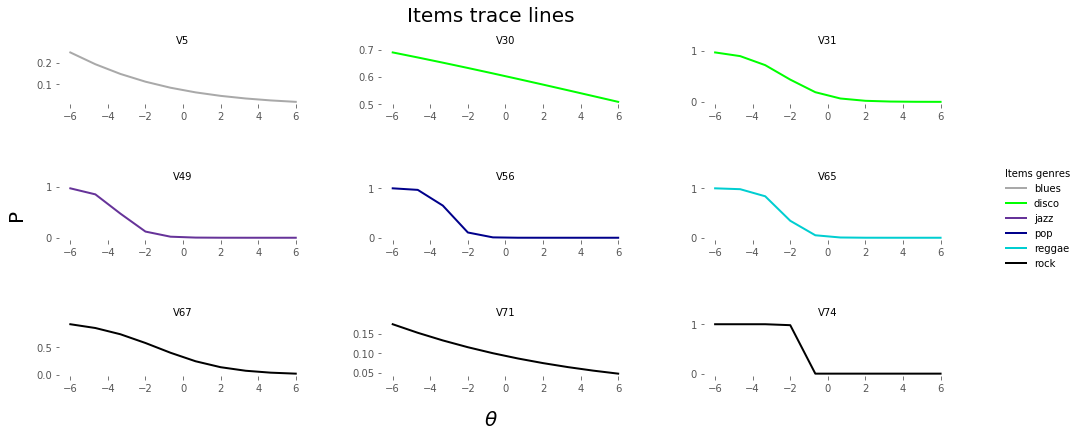

In [860]:
testDataNeg = ICC.icc_plots_only_negative_items(save_file_name = 'icc_plots_TEST_NegXXXYY.png')
testDataNeg

len(theta) =  74


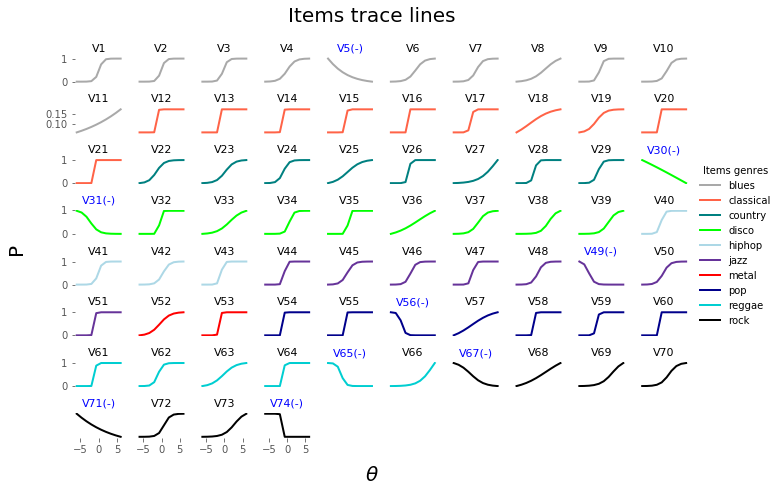

In [745]:
ICC.icc_plots_by_genres_negative_items(x = 8, y = 10, save_file_name = 'icc_plots_TEST_NEXXYgAYX.png')

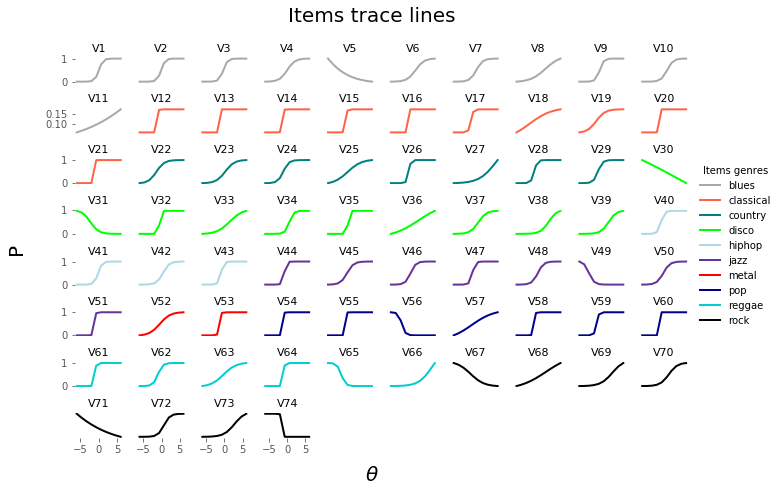

In [746]:
ICC.icc_plots_by_genres(x = 8, y = 10, save_file_name = 'icc_plots_TEST_TOEXdfgYX.png')

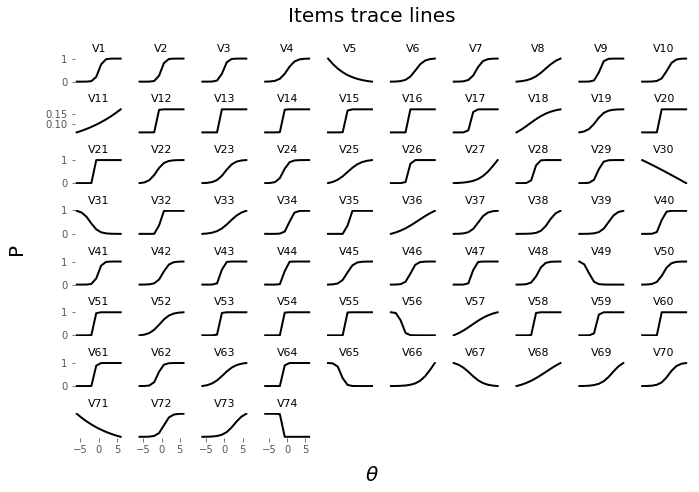

In [754]:
ICC.icc_plots(x = 8, y = 10, save_file_name = 'icc_plots_TEST_TdfjdnfnXYX.png')

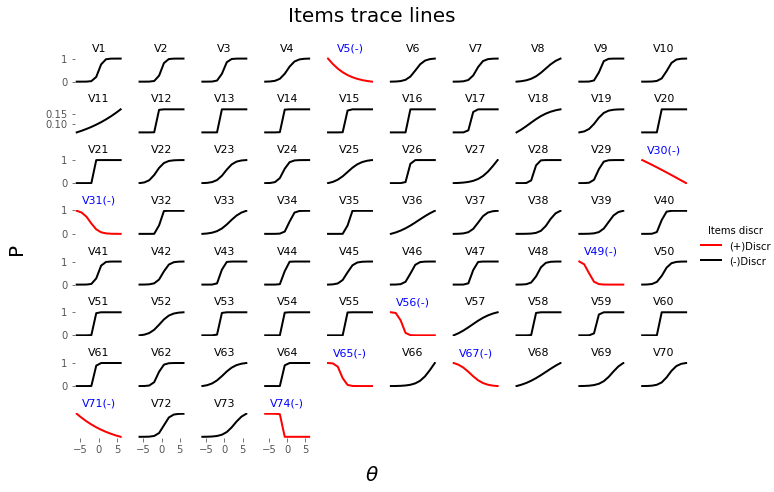

In [782]:
ICC.icc_plots_negative_items(x = 8, y = 10, save_file_name = 'icc_plots_TEST_TOEhghfdgZZTXYX.png')

0

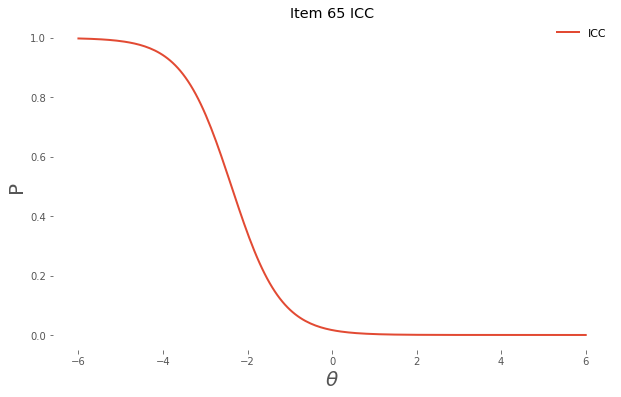

In [801]:
ICC.plot_icc_item(index = 64, framON = False, save_file_name = 'icc_plots_item_0.png')

2 5


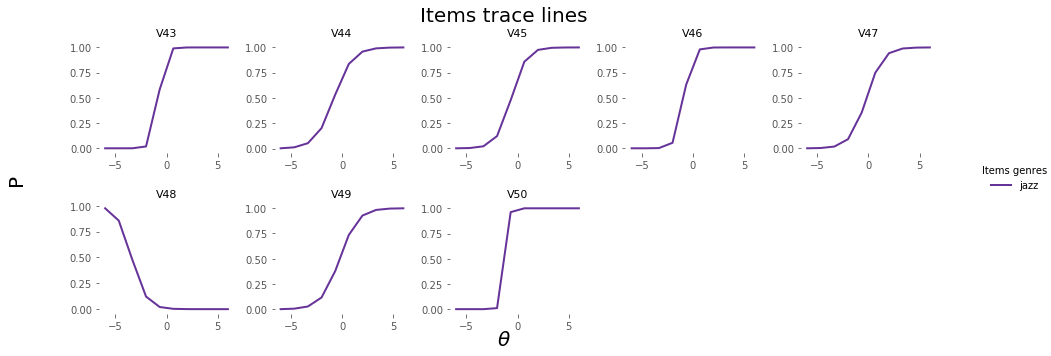

In [1324]:
ICC.icc_plots_all_items_in_genres(song_genre = 5, save_file_name = 'icc_plots_TEST_XXXXXYRT10X.png')

In [783]:
def icc_probability(theta, a,b,c = 0) :
    
    L = a*(theta - b)
    expnl = 1 + np.exp(-L)
    P = c + (1 - c) / expnl
    
    return P

def total_scores(a, b, c) :
    total_sum = []
    theta = np.linspace(-6,6,1000)
    for i in range(len(theta)) :
        theta_sum = sum(icc_probability(theta[i], a,b,c))
        total_sum.append(theta_sum)
        
    return theta, total_sum

In [785]:
def plot_all_total_scores(theta, total_sum0, total_sum1, total_sum2, total_sum3, cat = '') :
    fig, ax = plt.subplots(1,1,figsize=(10,6))
    ax.plot(theta, total_sum0, 'r--',  label = 'Rasch' )
    ax.plot(theta, total_sum1, color = 'blue', label = '1PL' )
    ax.plot(theta, total_sum2, 'g-.', label = '2PL'  )
    ax.plot(theta, total_sum3, color = 'black', label = '3PL'  )
    ax.set_xlabel(r'$\theta$', color = "black", fontsize = 20)
    ax.set_ylabel(r'T($\theta$)', color = "black", fontsize = 20)
    leg = ax.legend(loc = 'best')
    title_obj = ax.set_title('Total scores')
    ax.set_frame_on(False)
    plt.savefig("total_score_all_models_"+ str(cat) + ".png") 

In [787]:
a0, b0, c0 = get_models_parameters(model = 'Rasch')
a1, b1, c1 = get_models_parameters(model = '1PL')
a2, b2, c2 = get_models_parameters(model = '2PL')
a3, b3, c3 = get_models_parameters(model = '3PL')

theta0, total_sum0 = total_scores(a0, b0, c0) 
theta1, total_sum1 = total_scores(a1, b1, c1) 
theta2, total_sum2 = total_scores(a2, b2, c2) 
theta3, total_sum3 = total_scores(a3, b3, c3) 

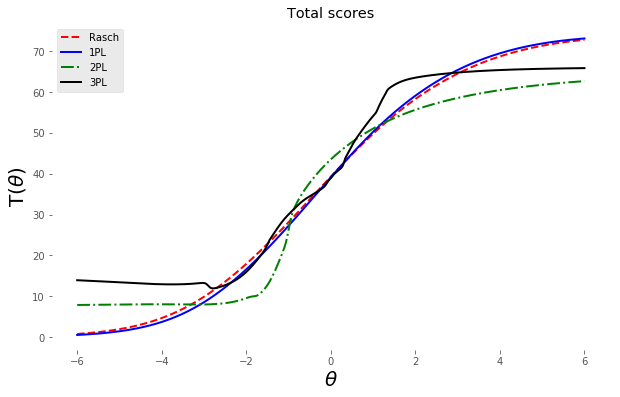

In [788]:
plot_all_total_scores(theta0, total_sum0, total_sum1, total_sum2, total_sum3)

In [1343]:
1e-20

1e-20

In [1347]:
class items_information_plots :
    
    def __init__(self, a,b,c):
        self.a = a
        self.b = b
        self.c = c
        self.negIndices = np.argwhere(a < 0).flatten()
        print("self.negIndices =  ", self.negIndices)
        # Labels for all the test items if any 
        self.RESPONSE_TEST_INDICES = np.loadtxt('intersections.txt', dtype = np.dtype(int))
        ytest_labels = self.get_labels(self.RESPONSE_TEST_INDICES)
        self.ytest_labels = np.array(ytest_labels)
        
        
    def icc_probability(self, theta, a,b,c = 0) :

        L = a*(theta - b)
        expnl = 1 + np.exp(-L)
        P = c + (1 - c) / expnl

        return P
    
    def item_information_curve(self, a, b, c, model = 'Rasch') :

        theta = np.linspace(-6,6,1000)
        theta_sum = icc_probability(theta, a,b,c)
        switcher={
            'Rasch' : theta_sum * (1 - theta_sum),
            '1PL' : (a**2) * theta_sum * (1 - theta_sum),
            '2PL': (a**2) * theta_sum * (1 - theta_sum),
            '3PL': (a**2) * ((1 - theta_sum)/ theta_sum ) * ((theta_sum - c)**2 / (1 - c)**2),
            }

        I = switcher.get(model,0)
        return theta, I

    def item_characteristic_curve(self, a,b,c = 0) :

        #theta = np.arange(-6,7,1)
        theta = np.linspace(-6,6,200)
        L = a*(theta - b)
        expnl = 1 + np.exp(-L)
        P = c + (1 - c) / expnl

        return theta, P
    
    def plot_item_info(self, index = 0, irt_model = 'Rasch',framON = False, save_file_name = 'icc_plots_TEST_XXXTRYX.png'):
        fig, ax = plt.subplots(figsize=(10,6))
        theta, I = self.item_information_curve(self.a[index], self.b[index], self.c[index], model = irt_model)
        
        ax.plot(theta, I, label = 'Item information')
        title_obj = ax.set_title("Item " + str(index + 1)+ " information curve")
        ax.set_xlabel(r'$\theta$', fontsize = 20)
        ax.set_ylabel(r'I($\theta$)',  rotation='vertical', fontsize = 20)
        leg = ax.legend(loc='best', fontsize=11,  shadow=False, ncol=2, borderaxespad=0, frameon=False)
        if not framON : 
            ax.set_frame_on(False)
        plt.savefig(save_file_name) 
        
        return 0
    
    def plot_item_error(self, index = 0, irt_model = 'Rasch',framON = False, save_file_name = 'icc_plots_TEST_XXXTRYX.png'):
        fig, ax = plt.subplots(figsize=(10,6))
        theta, I = self.item_information_curve(self.a[index], self.b[index], self.c[index], model = irt_model)
        print("I : ", I)
        print(" 1 / np.sqrt(I) + eps : ", 1 / (np.sqrt(I) + 1e-20 ))
        print(" 1 / np.sqrt(I) : ", 1 / np.sqrt(I))
        ax.plot(theta, 1 / (np.sqrt(I) + 1e-20 ), label = 'Item information')
        title_obj = ax.set_title("Item " + str(index + 1)+ " information curve")
        ax.set_xlabel(r'$\theta$', fontsize = 20)
        ax.set_ylabel(r'I($\theta$) - Error',  rotation='vertical', fontsize = 20)
        leg = ax.legend(loc='best', fontsize=11,  shadow=False, ncol=2, borderaxespad=0, frameon=False)
        if not framON : 
            ax.set_frame_on(False)
        plt.savefig(save_file_name) 
        
        return 0

    def plot_test_info(self, irt_model = 'Rasch', save_file_name = 'icc_plots_test_info_scores.png') :
        theta0, total_sum0 = self.test_information_scores(self.a, self.b, self.c, irt_model = irt_model)
        fig, ax = plt.subplots(1,1,figsize=(10,6))
        ax.plot(theta0, total_sum0, 'blue',  label = irt_model)
        ax.set_xlabel(r'$\theta$', color = "black", fontsize = 20)
        ax.set_ylabel(r'T($\theta$)', color = "black", fontsize = 20)
        leg = ax.legend(loc = 'best')
        title_obj = ax.set_title('Total scores')
        ax.set_frame_on(False)
        plt.savefig(save_file_name) 
        
    def plot_test_error(self, irt_model = 'Rasch', save_file_name = 'icc_plots_test_info_scores.png') :
        theta0, total_sum0 = self.test_information_scores(self.a, self.b, self.c, irt_model = irt_model)
        fig, ax = plt.subplots(1,1,figsize=(10,6))
        ax.plot(theta0, total_sum0, 'blue',  label = irt_model)
        ax.set_xlabel(r'$\theta$', color = "black", fontsize = 20)
        ax.set_ylabel(r'T($\theta$)', color = "black", fontsize = 20)
        leg = ax.legend(loc = 'best')
        title_obj = ax.set_title('Total scores')
        ax.set_frame_on(False)
        plt.savefig(save_file_name) 
        
    def test_information_curve(self, theta, a,b,c, model = 'Rasch') :
        """
        theta : scalar
        a,b,c : vectors 
        """
        theta_sum = icc_probability(theta, a,b,c)
        switcher={
            'Rasch' : theta_sum * (1 - theta_sum),
            '1PL' : (a**2) * theta_sum * (1 - theta_sum),
            '2PL': (a**2) * theta_sum * (1 - theta_sum),
            '3PL': (a**2) * ((1 - theta_sum)/ theta_sum ) * ((theta_sum - c)**2 / (1 - c)**2),
            }

        I = switcher.get(model,0)
        return np.sum(I)
    
##########################################################################################################
    def icc_plots_all_items_in_genres(self, song_genre = 0, irt_model = 'Rasch', save_file_name = 'icc_plots_TEST_XXXXXYX.png'):
        import matplotlib.pyplot as plt 
        #combined_thetas, combined_probs, indexes = self.test_infos_all_items_in_genres()
        combined_thetas, combined_probs, indexes = self.test_infos_all_items_in_genres(irt_model = irt_model) 
        
        theta = combined_thetas[song_genre]
        P = combined_probs[song_genre]
        indexes = indexes[song_genre]
        
        number_items = len(theta)
        y = 5
        x = math.ceil(number_items/y)
        if x == 1 :
            y = number_items
        print(x,y)

        count = 0
        line_labels = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
        genres_colors = theColors()

        figures_legends = []
        fig = plt.figure(figsize=(15,5))
        fig.subplots_adjust(hspace=0.45, wspace=0.3)

        for i in range(1, len(theta) + 1) :
                ax = fig.add_subplot(x, y, i)
                l_plot = ax.plot(theta[count], P[count], color = genres_colors[song_genre])
                figures_legends = l_plot[0]

                title_obj = ax.set_title('V' + str(indexes[i-1]), fontsize = 11, color = 'black')
                ax.set_frame_on(False)
                # Upgrade count
                count = count + 1

        # Create the legend
        fig.legend(handles = [figures_legends],     # The line objects
                       labels=[line_labels[song_genre]],   # The labels for each line
                       loc="center right",   # Position of legend
                       borderaxespad=0,
                       frameon=False,
                       title="Items genres"  # Title for the legend
                       )

        fig.suptitle("Items information curves", fontsize = 20)
        fig.text(0.5, 0.04, r'$\theta$', ha='center', fontsize = 20)
        fig.text(0.04, 0.5, r'I($\theta$)', va='center', rotation='vertical', fontsize = 20)
        plt.savefig(save_file_name)  
        

    def test_infos_all_items_in_genres(self, irt_model = 'Rasch') :
        
        y_TEST_filt = self.ytest_labels
        thetas, probs = self.get_theta_and_infos_all(irt_model = irt_model)

        thetas = np.array(thetas)
        probs = np.array(probs)
        categories = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
        combined_thetas = []
        combined_probs = []
        indexes = []
        for i in range(len(categories)) :
            indicices = np.array([False]*len(y_TEST_filt))
            indicices[np.argwhere(y_TEST_filt==i).flatten()] = True
            #print(np.argwhere(indicices==True).flatten())
            indexes.append(np.argwhere(indicices==True).flatten())
            abilities = thetas[indicices]
            levels = probs[indicices]
            combined_thetas.append(abilities)
            combined_probs.append(levels)

        return combined_thetas, combined_probs, indexes
###############################################################################################################

    def test_information_scores(self, a, b, c, irt_model = '2PL') :
        total_sum = []
        theta = np.linspace(-6,6,1000)
        for i in range(len(theta)) :
            I_sum = self.test_information_curve(theta[i], a,b,c, model = irt_model)
            total_sum.append(I_sum)

        return theta, total_sum
    
    def test_infos_by_genres(self, irt_model = 'Rasch') :
        print("irt_model in (test_infos_by_genres) : ", irt_model)
        categories = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
        thetas = []
        infos = []
        y_TEST_filt = self.ytest_labels
        for i in range(len(categories)) :
            indicices = np.array([False]*len(y_TEST_filt))
            indicices[np.argwhere(y_TEST_filt==i).flatten()] = True
            theta, total_sum = test_information_scores(self.a[indicices], self.b[indicices], self.c[indicices], model = irt_model) 
            thetas.append(theta)
            infos.append(total_sum)

        return thetas, infos
    
    def test_error_by_genres(self, irt_model = 'Rasch') :
        print("irt_model in (test_infos_by_genres) : ", irt_model)
        categories = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
        thetas = []
        infos = []
        y_TEST_filt = self.ytest_labels
        for i in range(len(categories)) :
            indicices = np.array([False]*len(y_TEST_filt))
            indicices[np.argwhere(y_TEST_filt==i).flatten()] = True
            theta, total_sum = test_information_scores(self.a[indicices], self.b[indicices], self.c[indicices], model = irt_model) 
            thetas.append(theta)
            infos.append(1 / np.sqrt(total_sum))

        return thetas, infos
    
    def error_curves_plots_by_genres(self, irt_model = 'Rasch', save_file_name = 'icc_plots_TEST_XXX8451XYX.png'):
        import matplotlib.pyplot as plt 
        print("irt_model : ", irt_model)
        theta, P = self.test_error_by_genres(irt_model = irt_model)
        x = 2
        y = 5

        count = 0
        line_labels = ['Blues','Classical','Country','Disco','Hiphop','Jazz','Metal','Pop','Reggae','Rock']
        genres_colors = theColors()
        figures_legends = []
        fig = plt.figure(figsize=(11,7))
        fig.subplots_adjust(hspace=0.5, wspace=0.3)

        for i in range(1, len(theta) + 1) :
                ax = fig.add_subplot(x, y, i)
                l_plot = ax.plot(theta[count], P[count], color = genres_colors[i-1])
                figures_legends.append(l_plot[0])

                title_obj = ax.set_title(line_labels[i-1], fontsize = 11, color = 'black')
                ax.set_frame_on(False)
                # Upgrade count
                count = count + 1

        # Create the legend
        fig.legend(handles = figures_legends,
                   labels=line_labels,
                   loc="center right",
                   borderaxespad=0,
                   frameon=False,
                   title="Info genres")

        fig.suptitle("Error curves by genres", fontsize = 20)
        fig.text(0.5, 0.04, r'$\theta$', ha='center', fontsize = 20)
        fig.text(0.04, 0.5, r'I($\theta$) - Error', va='center', rotation='vertical', fontsize = 20)
        plt.savefig(save_file_name)  


    def info_curves_plots_by_genres(self, irt_model = 'Rasch', save_file_name = 'icc_plots_TEST_XXX8451XYX.png'):
        import matplotlib.pyplot as plt 
        print("irt_model : ", irt_model)
        theta, P = self.test_infos_by_genres(irt_model = irt_model)
        x = 2
        y = 5

        count = 0
        line_labels = ['Blues','Classical','Country','Disco','Hiphop','Jazz','Metal','Pop','Reggae','Rock']
        genres_colors = theColors()
        figures_legends = []
        fig = plt.figure(figsize=(11,7))
        fig.subplots_adjust(hspace=0.5, wspace=0.3)

        for i in range(1, len(theta) + 1) :
                ax = fig.add_subplot(x, y, i)
                l_plot = ax.plot(theta[count], P[count], color = genres_colors[i-1])
                figures_legends.append(l_plot[0])

                title_obj = ax.set_title(line_labels[i-1], fontsize = 11, color = 'black')
                ax.set_frame_on(False)
                # Upgrade count
                count = count + 1

        # Create the legend
        fig.legend(handles = figures_legends,
                   labels=line_labels,
                   loc="center right",
                   borderaxespad=0,
                   frameon=False,
                   title="Info genres")

        fig.suptitle("Information curves by genres", fontsize = 20)
        fig.text(0.5, 0.04, r'$\theta$', ha='center', fontsize = 20)
        fig.text(0.04, 0.5, r'I($\theta$)', va='center', rotation='vertical', fontsize = 20)
        plt.savefig(save_file_name)  

    def get_theta_and_info_negatives(self, irt_model = 'Rasch') :
        """
        Append all the ICCs for each item (a_i,b_i, c_i) with 
        negative discriminant and return thetas and probabilities
        """
        thetas = []
        infos = []
        for i in self.negIndices :
            theta, I = self.item_information_curve(self.a[i], self.b[i], self.c[i], model = irt_model)
            thetas.append(theta)
            infos.append(I)
        return thetas, infos 
    
    def get_theta_and_infos_all(self, irt_model = 'Rasch') :
        """
        Append all the info curves for each item (a_i,b_i, c_i) with 
        negative discriminant and return thetas and probabilities
        """
        thetas = []
        infos = []
        for i in range(len(self.a)) :
            theta, I = self.item_information_curve(self.a[i], self.b[i], self.c[i], model = irt_model)
            thetas.append(theta)
            infos.append(I)
        return thetas, infos 
    
    def icc_plots_only_negative_items(self, x = 3, y = 3, irt_model = 'Rasch', save_file_name = 'icc_plots_TEST_NegXXX.png'):

        import matplotlib.pyplot as plt 
        # Read the thetas and probbilities of all neg. items 
        theta, P = self.get_theta_and_info_negatives(irt_model)
        
        # Read the labels of the test items (total = 74)
        ytest_labels = self.get_labels(self.RESPONSE_TEST_INDICES)
        ytest_labels = np.array(ytest_labels)
        ytest_labels = ytest_labels[self.negIndices]
        #print("ytest_labels = ", ytest_labels)
        
        line_labels = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
        #print("line_labels 1 = ", line_labels)
        #line_labels = [line_labels[i] for i in ytest_labels]
        #print("line_labels 2 = ", line_labels)
        genres_colors = self.theColors()
        a = np.array(ytest_labels)
        genres_labels, genres_indices = np.unique(a, return_index=True)
        figures_legends = []
        line_labels = [line_labels[i] for i in genres_labels]
        #print("line_labels 2 = ", line_labels)
        
        
        # plot items 
        count = 0
        total = len(theta)

        fig = plt.figure(figsize=(16,6))
        fig.subplots_adjust(hspace=1.5, wspace=0.3)
        for i in range(1, len(theta) + 1) :
            ax = fig.add_subplot(x, y, i)
            l_plot = ax.plot(theta[count], P[count], color = genres_colors[ytest_labels[i-1]])
            # Save some plots for the legends 
            if i-1 in genres_indices : 
                figures_legends.append(l_plot[0])


            #ax.plot(theta[count], P[count])
            title_obj = ax.set_title('V' + str(self.negIndices[count] + 1), fontsize = 10)
            ax.set_frame_on(False)
            # Upgrade count
            count = count + 1
        #print("len(figures_legends) = ", len(figures_legends))
        # Create the legend
        # ax.legend(loc='best', fontsize=11, ncol=2, shadow=False, borderaxespad=0, frameon=False)
        fig.legend(handles = figures_legends,     # The line objects
                       labels=line_labels,   # The labels for each line
                       loc="center right",   # Position of legend
                       borderaxespad=0,
                       frameon=False,
                       title="Items genres"  # Title for the legend
                       )

        fig.suptitle("Items information curves", fontsize = 20)
        fig.text(0.5, 0.04, r'$\theta$', ha='center', fontsize = 20)
        fig.text(0.04, 0.5, r'I($\theta$)', va='center', rotation='vertical', fontsize = 20)
        plt.savefig(save_file_name)  
        
        
    def get_labels(self, list_test) :
        test_labels = []
        for index in list_test : 
            test_labl = math.floor(index / 100)
            test_labels.append(test_labl)

        return test_labels

    def theColors(self) :
        c = ['darkgrey',
        'tomato',
        'teal',
        'lime',
        'lightblue',
        'rebeccapurple',
        'red',
        'darkblue',
        'darkturquoise', 
        'black']
        return c
    
    def icc_plots_by_genres_negative_items(self,x = 8, y = 10, irt_model = 'Rasch', save_file_name = 'icc_plots_TEST_XXXXXYX.png'):

        import matplotlib.pyplot as plt 
        # Read the thetas and probbilities of all neg. items 
        theta, P = self.get_theta_and_infos_all(irt_model)
        print("len(theta) = ", len(theta))

        # Read the labels of the test items (total = 74)
        ytest_labels = self.get_labels(self.RESPONSE_TEST_INDICES)
        ytest_labels = np.array(ytest_labels)

        count = 0
        total = len(theta)
        y_axis_values = np.arange(0,total-10,10)
        plt.rc('lines', lw=2, c='r')

        # For plotting the legends (Optional)
        line_labels = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
        genres_colors = self.theColors()
        a = np.array(ytest_labels)
        genres_labels, genres_indices = np.unique(a, return_index=True)
        figures_legends = []


        fig = plt.figure(figsize=(11,7))
        fig.subplots_adjust(hspace=1.0, wspace=0.3)
        for i in range(1, len(theta) + 1) :

                ax = fig.add_subplot(x, y, i)
                l_plot = ax.plot(theta[count], P[count], color = genres_colors[ytest_labels[i-1]])
                # Save some plots for the legends 
                if i-1 in genres_indices : 
                    figures_legends.append(l_plot[0])

                # Check if the current plot is a negative discriminant item 
                # if so change the the plot's title to 'VX(-)', where X is the
                # plots number 
                if i-1 in self.negIndices :
                    title_obj = ax.set_title('V' + str(count + 1) + '(-)', fontsize = 11, color = 'blue')
                else :
                    title_obj = ax.set_title('V' + str(count + 1), fontsize = 11, color = 'black')

                # Show the axis only on one side 
                show_y_axis = len(y_axis_values[np.isin(y_axis_values, count)]) == 1
                if count < (total - (total % 10) ) and not show_y_axis :
                    ax.set_axis_off()
                elif show_y_axis :
                    #print(i)
                    ax.set_frame_on(False)
                    ax.axes.get_xaxis().set_visible(False)
                else :
                    ax.set_frame_on(False)
                    ax.axes.get_yaxis().set_visible(False)

                # Upgrade count
                count = count + 1

        # Create the legend
        # ax.legend(loc='best', fontsize=11, ncol=2, shadow=False, borderaxespad=0, frameon=False)
        fig.legend(handles = figures_legends,     # The line objects
                       labels=line_labels,   # The labels for each line
                       loc="center right",   # Position of legend
                       borderaxespad=0,
                       frameon=False,
                       title="Items genres"  # Title for the legend
                       )

        fig.suptitle("Items information curves", fontsize = 20)
        fig.text(0.5, 0.04, r'$\theta$', ha='center', fontsize = 20)
        fig.text(0.04, 0.5, r'I($\theta$)', va='center', rotation='vertical', fontsize = 20)
        plt.savefig(save_file_name)  
        
        
        
    def icc_plots_by_genres(self,x = 8, y = 10, irt_model = 'Rasch', save_file_name = 'icc_plots_TEST_TOEXYX.png'):

        import matplotlib.pyplot as plt 
        # Read the thetas and probbilities of all neg. items 
        theta, P = self.get_theta_and_infos_all(irt_model)

        # Read the labels of the test items (total = 74)
        ytest_labels = self.get_labels(self.RESPONSE_TEST_INDICES)
        ytest_labels = np.array(ytest_labels)

        count = 0
        total = len(theta)
        y_axis_values = np.arange(0,total-10,10)

        # For plotting the legends (Optional)
        line_labels = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
        genres_colors = self.theColors()
        a = np.array(ytest_labels)
        genres_labels, genres_indices = np.unique(a, return_index=True)
        figures_legends = []


        fig = plt.figure(figsize=(11,7))
        fig.subplots_adjust(hspace=1.0, wspace=0.3)
        for i in range(1, len(theta) + 1) :

                ax = fig.add_subplot(x, y, i)
                l_plot = ax.plot(theta[count], P[count], color = genres_colors[ytest_labels[i-1]])
                # Save some plots for the legends 
                if i-1 in genres_indices : 
                    figures_legends.append(l_plot[0])

                # plots number 
                title_obj = ax.set_title('V' + str(count + 1), fontsize = 11, color = 'black')

                # Show the axis only on one side 
                show_y_axis = len(y_axis_values[np.isin(y_axis_values, count)]) == 1
                if count < (total - (total % 10) ) and not show_y_axis :
                    ax.set_axis_off()
                elif show_y_axis :
                    #print(i)
                    ax.set_frame_on(False)
                    ax.axes.get_xaxis().set_visible(False)
                else :
                    ax.set_frame_on(False)
                    ax.axes.get_yaxis().set_visible(False)

                # Upgrade count
                count = count + 1

        # Create the legend
        # ax.legend(loc='best', fontsize=11, ncol=2, shadow=False, borderaxespad=0, frameon=False)
        fig.legend(handles = figures_legends,     # The line objects
                       labels=line_labels,   # The labels for each line
                       loc="center right",   # Position of legend
                       borderaxespad=0,
                       frameon=False,
                       title="Items genres"  # Title for the legend
                       )

        fig.suptitle("Items information curves", fontsize = 20)
        fig.text(0.5, 0.04, r'$\theta$', ha='center', fontsize = 20)
        fig.text(0.04, 0.5, r'I($\theta$)', va='center', rotation='vertical', fontsize = 20)
        plt.savefig(save_file_name)  
        
    def icc_plots(self,x = 8, y = 10, irt_model = 'Rasch', save_file_name = 'icc_plots_TEST_TOEhsdbjdnXYX.png'):

        import matplotlib.pyplot as plt 
        # Read the thetas and probbilities of all neg. items 
        theta, P = self.get_theta_and_infos_all(irt_model)

        # Read the labels of the test items (total = 74)
        ytest_labels = self.get_labels(self.RESPONSE_TEST_INDICES)
        ytest_labels = np.array(ytest_labels)

        count = 0
        total = len(theta)
        y_axis_values = np.arange(0,total-10,10)

        fig = plt.figure(figsize=(11,7))
        fig.subplots_adjust(hspace=1.0, wspace=0.3)
        for i in range(1, len(theta) + 1) :

                ax = fig.add_subplot(x, y, i)
                l_plot = ax.plot(theta[count], P[count], color = 'black')
                # plots number 
                title_obj = ax.set_title('V' + str(count + 1), fontsize = 11, color = 'black')

                # Show the axis only on one side 
                show_y_axis = len(y_axis_values[np.isin(y_axis_values, count)]) == 1
                if count < (total - (total % 10) ) and not show_y_axis :
                    ax.set_axis_off()
                elif show_y_axis :
                    #print(i)
                    ax.set_frame_on(False)
                    ax.axes.get_xaxis().set_visible(False)
                else :
                    ax.set_frame_on(False)
                    ax.axes.get_yaxis().set_visible(False)

                # Upgrade count
                count = count + 1

        fig.suptitle("Items information curves", fontsize = 20)
        fig.text(0.5, 0.04, r'$\theta$', ha='center', fontsize = 20)
        fig.text(0.04, 0.5, r'I($\theta$)', va='center', rotation='vertical', fontsize = 20)
        plt.savefig(save_file_name)  
        
    def icc_plots_negative_items(self,x = 8, y = 10, irt_model = 'Rasch', save_file_name = 'icc_plots_TEST_TOEhsdbjdnXYX.png'):

        import matplotlib.pyplot as plt 
        # Read the thetas and probbilities of all neg. items 
        theta, P = self.get_theta_and_infos_all(irt_model)

        # For plotting the legends (Optional)
        line_labels = ['(+)Discr','(-)Discr']
        genres_colors = self.theColors()
        figures_legends = [0,0]

        count = 0
        total = len(theta)
        y_axis_values = np.arange(0,total-10,10)

        fig = plt.figure(figsize=(11,7))
        fig.subplots_adjust(hspace=1.0, wspace=0.3)
        for i in range(1, len(theta) + 1) :

            ax = fig.add_subplot(x, y, i)
            # plots number 
            #title_obj = ax.set_title('V' + str(count + 1), fontsize = 11, color = 'black')
            if i-1 in self.negIndices :
                title_obj = ax.set_title('V' + str(count + 1) + '(-)', fontsize = 11, color = 'blue')
                l_plot = ax.plot(theta[count], P[count], color = 'red')             
                figures_legends[0] = l_plot[0]
            else :
                title_obj = ax.set_title('V' + str(count + 1), fontsize = 11, color = 'black')
                l_plot = ax.plot(theta[count], P[count], color = 'black')
                figures_legends[1] = l_plot[0]

            # Show the axis only on one side 
            show_y_axis = len(y_axis_values[np.isin(y_axis_values, count)]) == 1
            if count < (total - (total % 10) ) and not show_y_axis :
                ax.set_axis_off()
            elif show_y_axis :
                #print(i)
                ax.set_frame_on(False)
                ax.axes.get_xaxis().set_visible(False)
            else :
                ax.set_frame_on(False)
                ax.axes.get_yaxis().set_visible(False)

            # Upgrade count
            count = count + 1
            
            
        # Create the legend
        # ax.legend(loc='best', fontsize=11, ncol=2, shadow=False, borderaxespad=0, frameon=False)
        fig.legend(handles = figures_legends,     # The line objects
                       labels=line_labels,   # The labels for each line
                       loc="center right",   # Position of legend
                       borderaxespad=0,
                       frameon=False,
                       title="Items discr"  # Title for the legend
                       )
            
        fig.suptitle("Items information curves", fontsize = 20)
        fig.text(0.5, 0.04, r'$\theta$', ha='center', fontsize = 20)
        fig.text(0.04, 0.5, r'I($\theta$)', va='center', rotation='vertical', fontsize = 20)
        plt.savefig(save_file_name)  

In [1348]:
irt_model = '3PL'
a, b, c = get_models_parameters(model = irt_model)
items_info = items_information_plots(a,b,c)

self.negIndices =   [ 4 30 48 55 64 66 70 73]


0

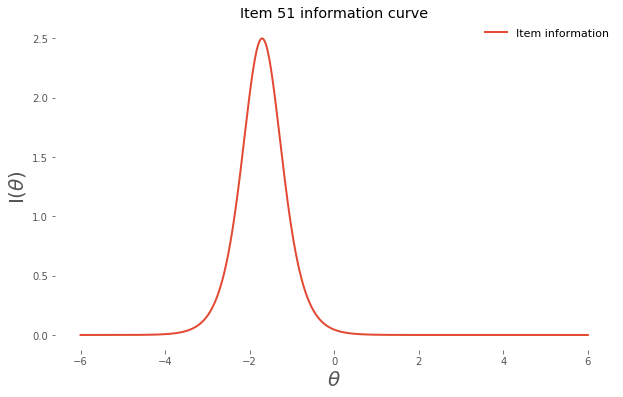

In [1351]:
items_info.plot_item_info(index = 50, irt_model = irt_model, framON = False, save_file_name = 'icc_plots_TEST_XY_info.png')

I :  [5.82115478e-07 6.26936951e-07 6.75165468e-07 7.27054924e-07
 7.82877555e-07 8.42925198e-07 9.07510630e-07 9.76968991e-07
 1.05165929e-06 1.13196603e-06 1.21830086e-06 1.31110445e-06
 1.41084831e-06 1.51803690e-06 1.63320971e-06 1.75694353e-06
 1.88985483e-06 2.03260233e-06 2.18588957e-06 2.35046777e-06
 2.52713877e-06 2.71675809e-06 2.92023825e-06 3.13855213e-06
 3.37273659e-06 3.62389623e-06 3.89320730e-06 4.18192187e-06
 4.49137208e-06 4.82297465e-06 5.17823555e-06 5.55875491e-06
 5.96623204e-06 6.40247071e-06 6.86938466e-06 7.36900316e-06
 7.90347698e-06 8.47508437e-06 9.08623733e-06 9.73948806e-06
 1.04375356e-05 1.11832325e-05 1.19795922e-05 1.28297957e-05
 1.37371993e-05 1.47053417e-05 1.57379522e-05 1.68389580e-05
 1.80124924e-05 1.92629027e-05 2.05947585e-05 2.20128602e-05
 2.35222470e-05 2.51282054e-05 2.68362783e-05 2.86522731e-05
 3.05822707e-05 3.26326343e-05 3.48100179e-05 3.71213760e-05
 3.95739715e-05 4.21753857e-05 4.49335267e-05 4.78566389e-05
 5.09533121e-05 5.4

0

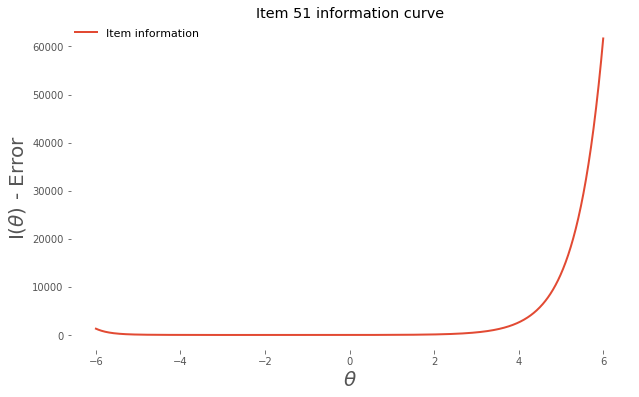

In [1352]:
items_info.plot_item_error(index = 50, irt_model = irt_model, framON = False, save_file_name = 'icc_plot_item_error.png')

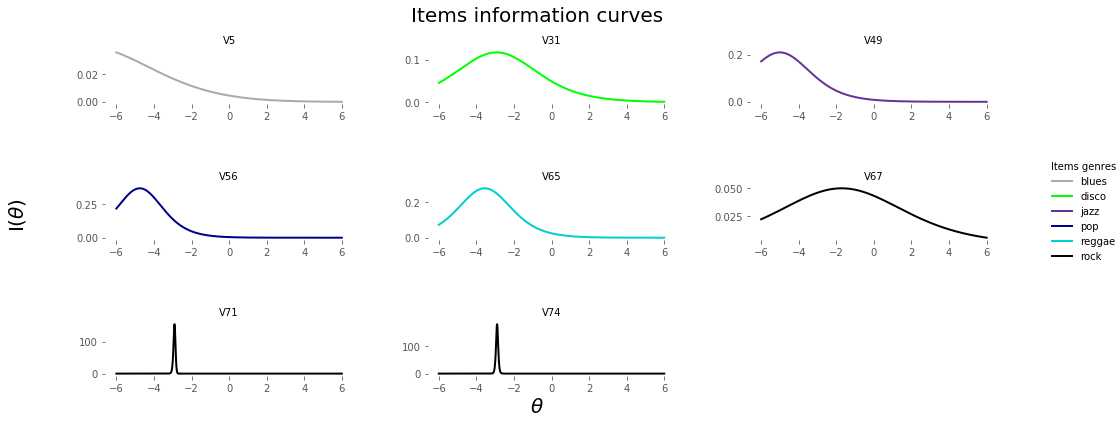

In [883]:
items_info.icc_plots_only_negative_items(irt_model = irt_model, save_file_name = 'icc_plots_TEST_infogjsdsd.png')

len(theta) =  74


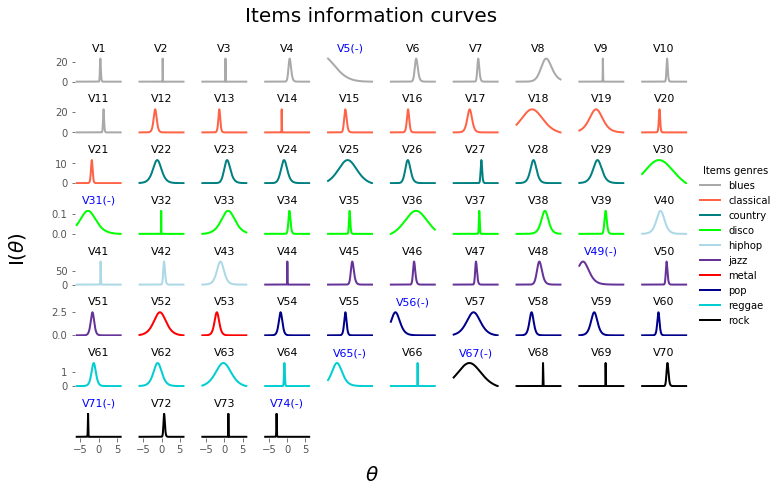

In [884]:
items_info.icc_plots_by_genres_negative_items(irt_model = irt_model, save_file_name = 'icc_plots_TEST_XXXXXYX.png')

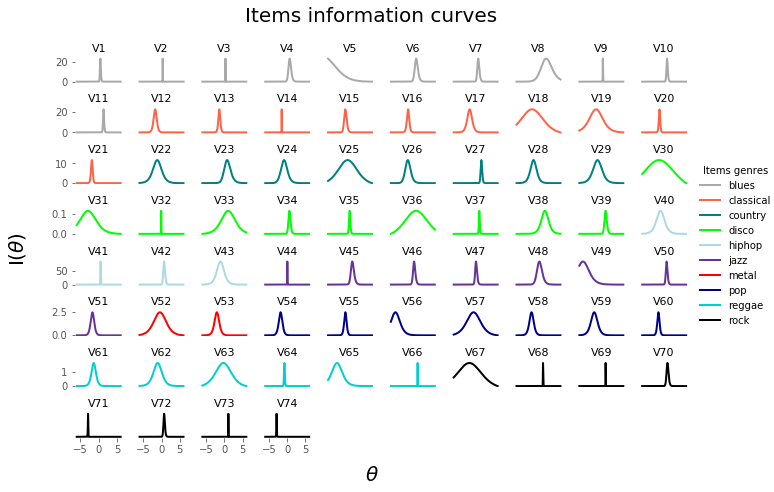

In [885]:
items_info.icc_plots_by_genres(irt_model = irt_model,save_file_name = 'icc_plots_TEST_TOEXYX.png')

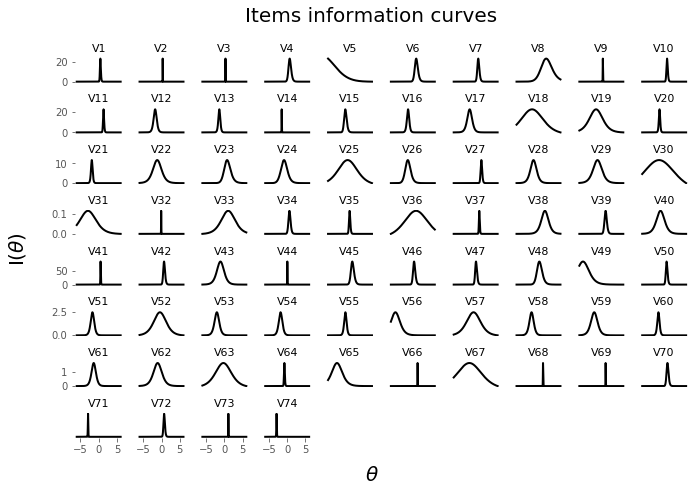

In [886]:
items_info.icc_plots(irt_model = irt_model,save_file_name = 'icc_plots_TEST_TOEXYX.png')

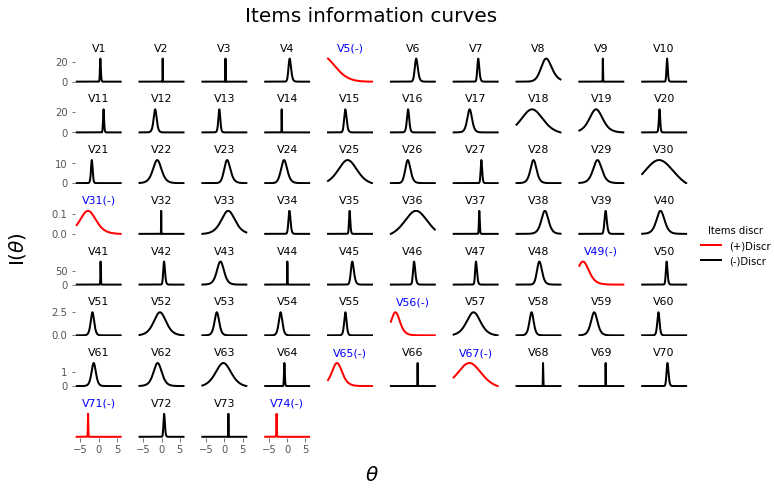

In [887]:
items_info.icc_plots_negative_items(irt_model = irt_model,save_file_name = 'icc_plots_TEST_TOEXYX.png')

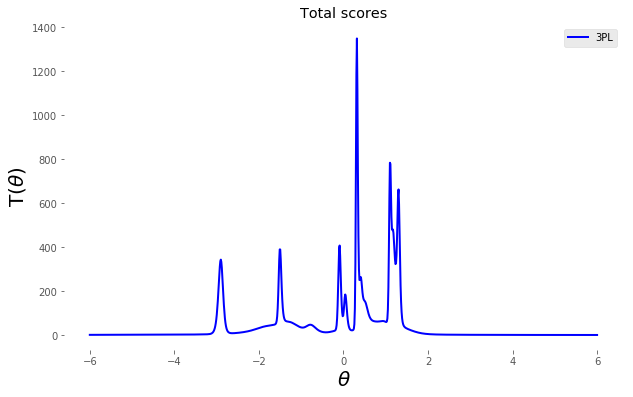

In [1276]:
items_info.plot_test_info(irt_model = irt_model, save_file_name = 'icc_plots_test_info_scores.png')

irt_model :  3PL
irt_model in (test_infos_by_genres) :  3PL


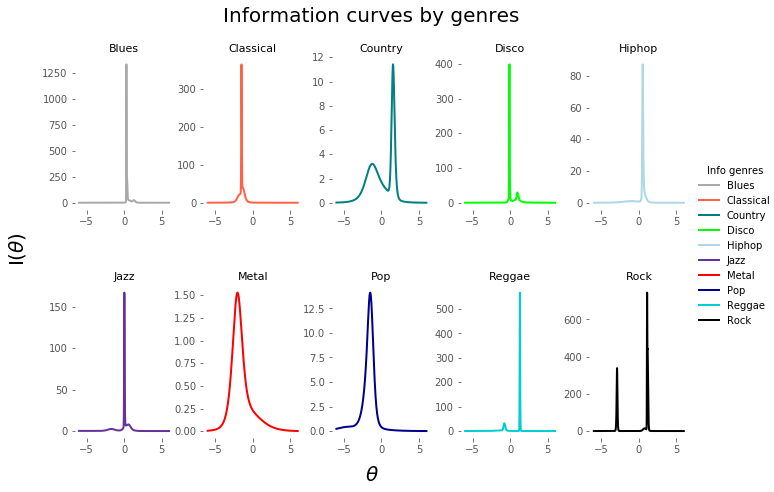

In [1331]:
items_info.info_curves_plots_by_genres(irt_model = irt_model, save_file_name = 'icc_plots_TEST_XXX8451XYX.png')

irt_model :  3PL
irt_model in (test_infos_by_genres) :  3PL


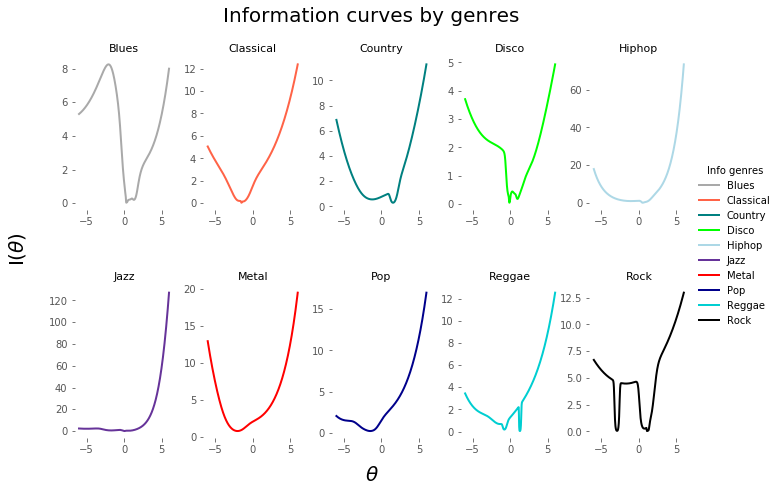

In [1335]:
items_info.error_curves_plots_by_genres(irt_model = irt_model, save_file_name = 'icc_plots_TEST_XXXError.png')

2 5


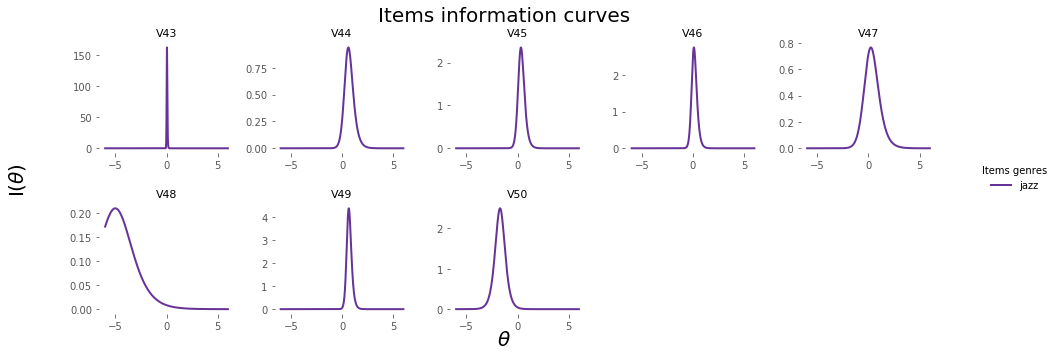

In [1332]:
items_info.icc_plots_all_items_in_genres(song_genre = 5, irt_model =  irt_model, save_file_name = 'info_plots_blues.png')

In [673]:
def icc_plots_negative_items(theta, P, x, y, indexModel = 3, save_file_name = 'icc_plots_TEST_XXXTRYX.png'):
    
    import matplotlib.pyplot as plt 
    
    data,_ = read_data()
    testDataNeg, RESPONSE_TEST_INDIXICES = get_test_with_negDiscriminant(data, indexModel = indexModel)
    songDirectories = testDataNeg['Song'].tolist()
    negIndices = testDataNeg['Unnamed: 0'].tolist()
    negIndices = [ int(i[1:]) for i in negIndices]
    negIndices = np.array(negIndices)
    
    count = 0
    total = len(theta)

    fig = plt.figure(figsize=(16,6))
    fig.subplots_adjust(hspace=1.5, wspace=0.3)
    for i in range(1, len(theta) + 1) :

            ax = fig.add_subplot(x, y, i)
            ax.plot(theta[count], P[count])
            title_obj = ax.set_title('V' + str(negIndices[count]), fontsize = 10)
            
            ax.set_frame_on(False)
            # Upgrade count
            count = count + 1
            
    fig.suptitle("Items trace lines", fontsize = 20)
    fig.text(0.5, 0.01, r'$\theta$', ha='center', fontsize = 20)
    fig.text(0.08, 0.5, 'P', va='center', rotation='vertical', fontsize = 20)
    plt.savefig(save_file_name) 

In [665]:
data,_ = read_data()
indexModel = 2
testDataNeg, RESPONSE_TEST_INDIXICES = get_test_with_negDiscriminant(data, indexModel = indexModel)
songDirectories = testDataNeg['Song'].tolist()
negIndices = testDataNeg['Unnamed: 0'].tolist()
negIndices = [ int(i[1:]) for i in negIndices]
negIndices = np.array(negIndices) - 1
print(negIndices)
print(len(negIndices))

[ 4 29 30 48 55 64 66 70 73]
9


In [668]:
a, b, c = get_models_parameters(model = '2PL')
thetas = []
probabilities = []
for i in negIndices :
    theta, P = item_characteristic_curve(a[i],b[i],c[i])
    thetas.append(theta)
    probabilities.append(P)

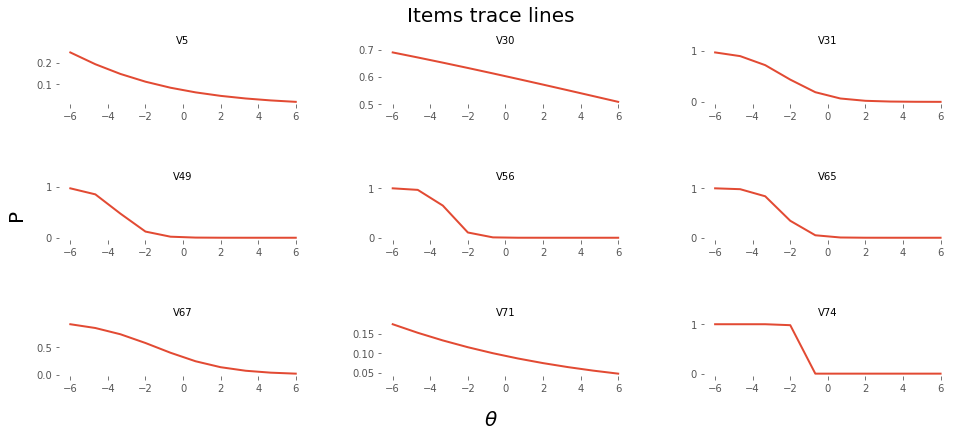

In [674]:
icc_plots_negative_items(thetas, probabilities, 3, 3, indexModel = 2, save_file_name = 'icc_plots_TEST_Xkromagnion.png')

In [642]:
data,_ = read_data()
testDataNeg, RESPONSE_TEST_INDIXICES = get_test_with_negDiscriminant(data, indexModel = 2)
songDirectories = testDataNeg['Song'].tolist()
testDataNeg 

Unnamed: 0  Index          Song  Discrimination  Difficulty  Guessing
4          V5     23   blues.00023       -0.240784  -10.593972         0
29        V30    301   disco.00001       -0.063796    6.522547         0
30        V31    321   disco.00021       -0.894630   -2.295188         0
48        V49    587    jazz.00087       -1.408842   -3.402118         0
55        V56    769     pop.00069       -2.061430   -3.033730         0
64        V65    879  reggae.00079       -1.718398   -2.379427         0
66        V67    910    rock.00010       -0.542913   -1.408560         0
70        V71    933    rock.00033       -0.121095  -18.814481         0
73        V74    947    rock.00047      -22.011629   -1.821236         0

In [412]:
negIndices = testDataNeg['Unnamed: 0'].tolist()
negIndices = [ int(i[1:]) for i in negIndices]
negIndices

[5, 30, 31, 49, 56, 65, 67, 71, 74]

In [388]:
def icc_plots_by_genres_negative_items(theta, P, x, y, indexModel = 2, save_file_name = 'icc_plots_TEST_XXXXXYX.png'):
    
    import matplotlib.pyplot as plt 
    
    # Read the indices of items with negatives discriminant 
    # negIndices = [5, 30, 31, 49, 56, 65, 67, 71, 74]
    data,_ = read_data()
    testDataNeg, RESPONSE_TEST_INDIXICES = get_test_with_negDiscriminant(data, indexModel = indexModel)
    songDirectories = testDataNeg['Song'].tolist()
    negIndices = testDataNeg['Unnamed: 0'].tolist()
    negIndices = [ int(i[1:]) for i in negIndices]
    
    # Read the labels of the test items (total = 74)
    RESPONSE_TEST_INDICES = np.loadtxt('intersections.txt', dtype = np.dtype(int))
    ytest_labels = get_labels(RESPONSE_TEST_INDICES)
    ytest_labels = np.array(ytest_labels)

    count = 0
    total = len(thetas)
    y_axis_values = np.arange(0,total-10,10)
    plt.rc('lines', lw=2, c='r')
    
    # For plotting the legends (Optional)
    line_labels = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
    genres_colors = theColors()
    a = np.array(ytest_labels)
    genres_labels, genres_indices = np.unique(a, return_index=True)
    figures_legends = []
    

    fig = plt.figure(figsize=(11,7))
    fig.subplots_adjust(hspace=1.0, wspace=0.3)
    for i in range(1, len(thetas) + 1) :

            ax = fig.add_subplot(x, y, i)
            l_plot = ax.plot(theta[count], P[count], color = genres_colors[ytest_labels[i-1]])
            # Save some plots for the legends 
            if i-1 in genres_indices : 
                figures_legends.append(l_plot[0])
            
            # Check if the current plot is a negative discriminant item 
            # if so change the the plot's title to 'VX(-)', where X is the
            # plots number 
            if i in negIndices :
                title_obj = ax.set_title('V' + str(count + 1) + '(-)', fontsize = 11, color = 'blue')
            else :
                title_obj = ax.set_title('V' + str(count + 1), fontsize = 11, color = 'black')
            
            # Show the axis only on one side 
            show_y_axis = len(y_axis_values[np.isin(y_axis_values, count)]) == 1
            if count < (total - (total % 10) ) and not show_y_axis :
                ax.set_axis_off()
            elif show_y_axis :
                #print(i)
                ax.set_frame_on(False)
                ax.axes.get_xaxis().set_visible(False)
            else :
                ax.set_frame_on(False)
                ax.axes.get_yaxis().set_visible(False)
               
            # Upgrade count
            count = count + 1
            
    # Create the legend
    # ax.legend(loc='best', fontsize=11, ncol=2, shadow=False, borderaxespad=0, frameon=False)
    fig.legend(handles = figures_legends,     # The line objects
                   labels=line_labels,   # The labels for each line
                   loc="center right",   # Position of legend
                   borderaxespad=0,
                   frameon=False,
                   title="Items genres"  # Title for the legend
                   )

    fig.suptitle("Items trace lines", fontsize = 20)
    fig.text(0.5, 0.04, r'$\theta$', ha='center', fontsize = 20)
    fig.text(0.04, 0.5, 'P', va='center', rotation='vertical', fontsize = 20)
    plt.savefig(save_file_name)  

In [389]:
def icc_plots_by_genres(theta, P, x, y, save_file_name = 'icc_plots_TEST_XXXXXYX.png'):
    
    import matplotlib.pyplot as plt 
    RESPONSE_TEST_INDICES = np.loadtxt('intersections.txt', dtype = np.dtype(int))
    ytest_labels = get_labels(RESPONSE_TEST_INDICES)
    ytest_labels = np.array(ytest_labels)

    count = 0
    total = len(thetas)
    y_axis_values = np.arange(0,total-10,10)
    plt.rc('lines', lw=2, c='r')
    
    line_labels = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
    genres_colors = theColors()
    a = np.array(ytest_labels)
    genres_labels, genres_indices = np.unique(a, return_index=True)
    figures_legends = []
    

    fig = plt.figure(figsize=(11,7))
    fig.subplots_adjust(hspace=1.0, wspace=0.3)
    for i in range(1, len(thetas) + 1) :

            ax = fig.add_subplot(x, y, i)
            l_plot = ax.plot(theta[count], P[count], color = genres_colors[ytest_labels[i-1]])
            if i-1 in genres_indices : 
                figures_legends.append(l_plot[0])
            
            title_obj = ax.set_title('V' + str(count + 1), fontsize = 11, color = 'black')
            show_y_axis = len(y_axis_values[np.isin(y_axis_values, count)]) == 1
            if count < (total - (total % 10) ) and not show_y_axis :
                ax.set_axis_off()
            elif show_y_axis :
                #print(i)
                ax.set_frame_on(False)
                ax.axes.get_xaxis().set_visible(False)
            else :
                ax.set_frame_on(False)
                ax.axes.get_yaxis().set_visible(False)
               
            # Upgrade count
            count = count + 1
            
    # Create the legend
    # ax.legend(loc='best', fontsize=11, ncol=2, shadow=False, borderaxespad=0, frameon=False)

    fig.legend(handles = figures_legends,     # The line objects
                   labels=line_labels,   # The labels for each line
                   loc="center right",   # Position of legend
                   borderaxespad=0,
                   frameon=False,
                   title="Items genres"  # Title for the legend
                   )

    fig.suptitle("Items trace lines", fontsize = 20)
    fig.text(0.5, 0.04, r'$\theta$', ha='center', fontsize = 20)
    fig.text(0.04, 0.5, 'P', va='center', rotation='vertical', fontsize = 20)
    plt.savefig(save_file_name)  

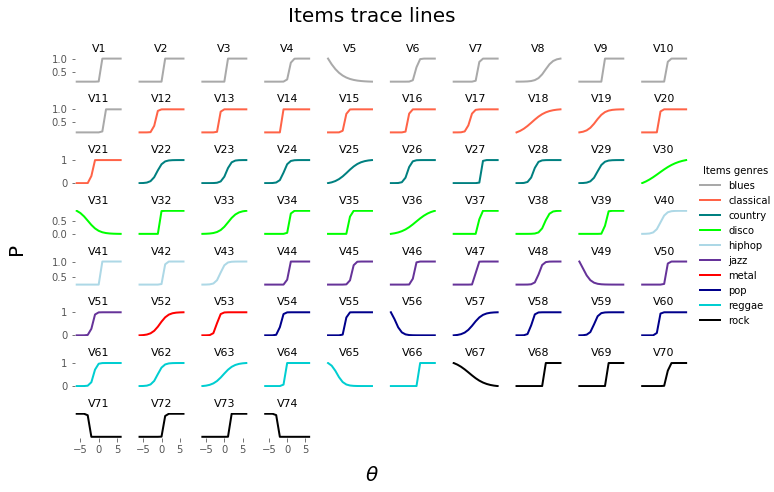

In [390]:
icc_plots_by_genres(thetas, probabilities, 8, 10)

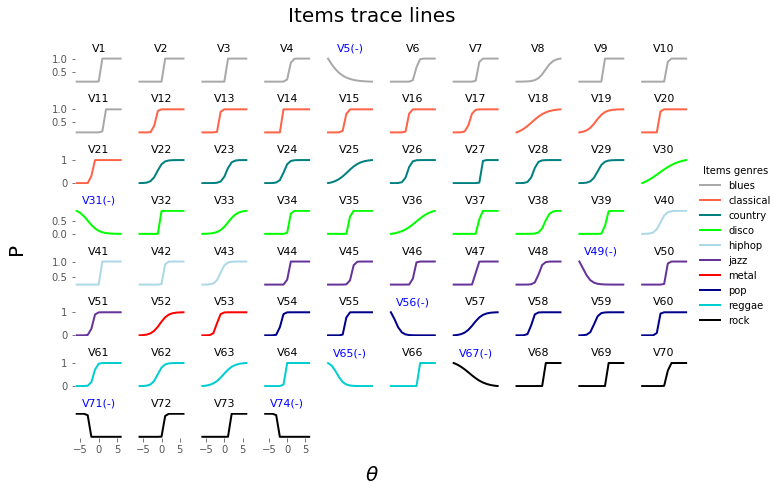

In [387]:
icc_plots_by_genres_negative_items(thetas, probabilities, 8, 10, indexModel = 3)

In [889]:
####################################################

In [890]:
####################################################
####################################################

In [891]:
####################################################

In [896]:
def theColors() :
    c = ['darkgrey',
    'tomato',
    'teal',
    'lime',
    'lightblue',
    'rebeccapurple',
    'red',
    'darkblue',
    'darkturquoise', 
    'black']
    return c

In [903]:
def test_information_curve(theta, a,b,c, model = 'Rasch') :
    """
    theta : scalar
    a,b,c : vectors 
    """
    theta_sum = icc_probability(theta, a,b,c)
    switcher={
        'Rasch' : theta_sum * (1 - theta_sum),
        '1PL' : (a**2) * theta_sum * (1 - theta_sum),
        '2PL': (a**2) * theta_sum * (1 - theta_sum),
        '3PL': (a**2) * ((1 - theta_sum)/ theta_sum ) * ((theta_sum - c)**2 / (1 - c)**2),
        }

    I = switcher.get(model,0)
    return np.sum(I)

def test_information_scores(a, b, c, model = '2PL') :
    total_sum = []
    theta = np.linspace(-6,6,1000)
    for i in range(len(theta)) :
        I_sum = test_information_curve(theta[i], a,b,c, model = irt_model)
        total_sum.append(I_sum)
        
    return theta, total_sum

def test_infos_by_genres(a, b, c, y_TEST_filt, model = 'Rasch') :

    categories = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
    lescouleurs = []
    lasColores = theColors()
    thetas = []
    infos = []
    for i in range(len(categories)) :
        indicices = np.array([False]*len(y_TEST_filt))
        indicices[np.argwhere(y_TEST_filt==i).flatten()] = True
        theta, total_sum = test_information_scores(a[indicices], b[indicices], c[indicices], model = irt_model) 
        thetas.append(theta)
        infos.append(total_sum)
        
    return thetas, infos

In [941]:
def info_curves_plots_by_genres(theta, P, x, y, save_file_name = 'icc_plots_TEST_XXX8451XYX.png'):
    
    import matplotlib.pyplot as plt 

    count = 0
    total = len(theta)
    y_axis_values = np.arange(0,total-10,10)
    
    line_labels = ['Blues','Classical','Country','Disco','Hiphop','Jazz','Metal','Pop','Reggae','Rock']
    genres_colors = theColors()
    a = np.array(ytest_labels)
    genres_labels, genres_indices = np.unique(a, return_index=True)
    figures_legends = []
    

    fig = plt.figure(figsize=(11,7))
    fig.subplots_adjust(hspace=1.0, wspace=0.3)
    for i in range(1, len(theta) + 1) :

            ax = fig.add_subplot(x, y, i)
            l_plot = ax.plot(theta[count], P[count], color = genres_colors[i-1])
            figures_legends.append(l_plot[0])
            
            title_obj = ax.set_title(line_labels[i-1], fontsize = 11, color = 'black')
            ax.set_frame_on(False)
               
            # Upgrade count
            count = count + 1
            
    # Create the legend
    # ax.legend(loc='best', fontsize=11, ncol=2, shadow=False, borderaxespad=0, frameon=False)

    fig.legend(handles = figures_legends,     # The line objects
                   labels=line_labels,   # The labels for each line
                   loc="center right",   # Position of legend
                   borderaxespad=0,
                   frameon=False,
                   title="Info genres"  # Title for the legend
                   )

    fig.suptitle("Information curves by genres", fontsize = 20)
    fig.text(0.5, 0.04, r'$\theta$', ha='center', fontsize = 20)
    fig.text(0.04, 0.5, r'I($\theta$)', va='center', rotation='vertical', fontsize = 20)
    plt.savefig(save_file_name)  

In [942]:
a0, b0, c0 = get_models_parameters(model = 'Rasch')
a1, b1, c1 = get_models_parameters(model = '1PL')
a2, b2, c2 = get_models_parameters(model = '2PL')
a3, b3, c3 = get_models_parameters(model = '3PL')

#theta0, total_sum0 = test_information_scores(a0, b0, c0, model = 'Rasch') 
#theta1, total_sum1 = test_information_scores(a1, b1, c1, model = '1PL') 
#theta2, total_sum2 = test_information_scores(a2, b2, c2, model = '2PL') 
#theta3, total_sum3 = test_information_scores(a3, b3, c3, model = '3PL') 

In [943]:
RESPONSE_TEST_INDICES = np.loadtxt('intersections.txt', dtype = np.dtype(int))
ytest_labels = get_labels(RESPONSE_TEST_INDICES)
ytest_labels = np.array(ytest_labels)

In [944]:
thetas, infos = test_infos_by_genres(a0, b0, c0, ytest_labels, model = 'Rasch')

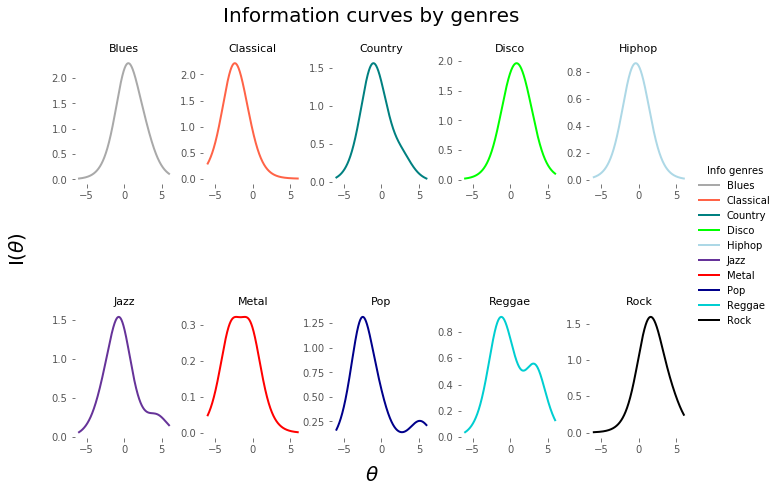

In [945]:
info_curves_plots_by_genres(thetas, infos, 2, 5, save_file_name = 'icc_plots_TEST_XXX8451XYX.png')

In [ ]:
def icc_plots_all_items_in_genres(theta, P, indexes, song_genre = 0, save_file_name = 'icc_plots_TEST_XXXXXYX.png'):
    import matplotlib.pyplot as plt 
    number_items = len(theta)
    y = 5
    x = math.ceil(number_items/y)

    count = 0
    line_labels = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
    genres_colors = theColors()

    figures_legends = []
    fig = plt.figure(figsize=(11,7))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i in range(1, len(theta) + 1) :
            ax = fig.add_subplot(x, y, i)
            l_plot = ax.plot(theta[count], P[count], color = genres_colors[song_genre])
            figures_legends = l_plot[0]
                
            title_obj = ax.set_title('V' + str(indexes[i-1]), fontsize = 11, color = 'black')
            ax.set_frame_on(False)
            # Upgrade count
            count = count + 1

    # Create the legend
    fig.legend(handles = [figures_legends],     # The line objects
                   labels=[line_labels[song_genre]],   # The labels for each line
                   loc="center right",   # Position of legend
                   borderaxespad=0,
                   frameon=False,
                   title="Items genres"  # Title for the legend
                   )

    fig.suptitle("Items trace lines", fontsize = 20)
    fig.text(0.5, 0.04, r'$\theta$', ha='center', fontsize = 20)
    fig.text(0.04, 0.5, 'P', va='center', rotation='vertical', fontsize = 20)
    plt.savefig(save_file_name)  

In [1293]:
def icc_plots_all_items_in_genres(theta, P, indexes, song_genre = 0, save_file_name = 'icc_plots_TEST_XXXXXYX.png'):
    import matplotlib.pyplot as plt 
    number_items = len(theta)
    y = 5
    x = math.ceil(number_items/y)
    if x == 1 :
        y = number_items
    print(x,y)

    count = 0
    line_labels = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
    genres_colors = theColors()

    figures_legends = []
    fig = plt.figure(figsize=(15,5))
    fig.subplots_adjust(hspace=0.45, wspace=0.3)
    
    for i in range(1, len(theta) + 1) :
            ax = fig.add_subplot(x, y, i)
            l_plot = ax.plot(theta[count], P[count], color = genres_colors[song_genre])
            figures_legends = l_plot[0]
                
            title_obj = ax.set_title('V' + str(indexes[i-1]), fontsize = 11, color = 'black')
            ax.set_frame_on(False)
            # Upgrade count
            count = count + 1

    # Create the legend
    fig.legend(handles = [figures_legends],     # The line objects
                   labels=[line_labels[song_genre]],   # The labels for each line
                   loc="center right",   # Position of legend
                   borderaxespad=0,
                   frameon=False,
                   title="Items genres"  # Title for the legend
                   )

    fig.suptitle("Items trace lines", fontsize = 20)
    fig.text(0.5, 0.04, r'$\theta$', ha='center', fontsize = 20)
    fig.text(0.04, 0.5, 'P', va='center', rotation='vertical', fontsize = 20)
    plt.savefig(save_file_name)  

In [1294]:
def test_infos_all_items_in_genres(thetas, probs, y_TEST_filt, model = 'Rasch') :
    
    thetas = np.array(thetas)
    probs = np.array(probs)
    categories = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
    lescouleurs = []
    lasColores = theColors()
    combined_thetas = []
    combined_probs = []
    indexes = []
    for i in range(len(categories)) :
        indicices = np.array([False]*len(y_TEST_filt))
        indicices[np.argwhere(y_TEST_filt==i).flatten()] = True
        print(np.argwhere(indicices==True).flatten())
        indexes.append(np.argwhere(indicices==True).flatten())
        abilities = thetas[indicices]
        levels = probs[indicices]
        combined_thetas.append(abilities)
        combined_probs.append(levels)
        
    return combined_thetas, combined_probs, indexes

In [1295]:
irt_model = 'Rasch'
a, b, c = get_models_parameters(model = irt_model)
a1, b1, c1 = get_models_parameters(model = '1PL')
a2, b2, c2 = get_models_parameters(model = '2PL')
a3, b3, c3 = get_models_parameters(model = '3PL')

In [1296]:
thetas = []
probabilities = []
for i in range(len(a)) :
    theta, P = item_characteristic_curve(a[i],b[i],c[i])
    thetas.append(theta)
    probabilities.append(P)

In [1297]:
RESPONSE_TEST_INDICES = np.loadtxt('intersections.txt', dtype = np.dtype(int))
ytest_labels = get_labels(RESPONSE_TEST_INDICES)
ytest_labels = np.array(ytest_labels)

In [1298]:
combined_thetas, combined_probs, indexes = test_infos_all_items_in_genres(thetas, probabilities, ytest_labels, model = irt_model)

[ 0  1  2  3  4  5  6  7  8  9 10]
[11 12 13 14 15 16 17 18 19 20]
[21 22 23 24 25 26 27 28]
[29 30 31 32 33 34 35 36 37 38]
[39 40 41 42]
[43 44 45 46 47 48 49 50]
[51 52]
[53 54 55 56 57 58 59]
[60 61 62 63 64 65]
[66 67 68 69 70 71 72 73]


In [1303]:
index = 8

2 5


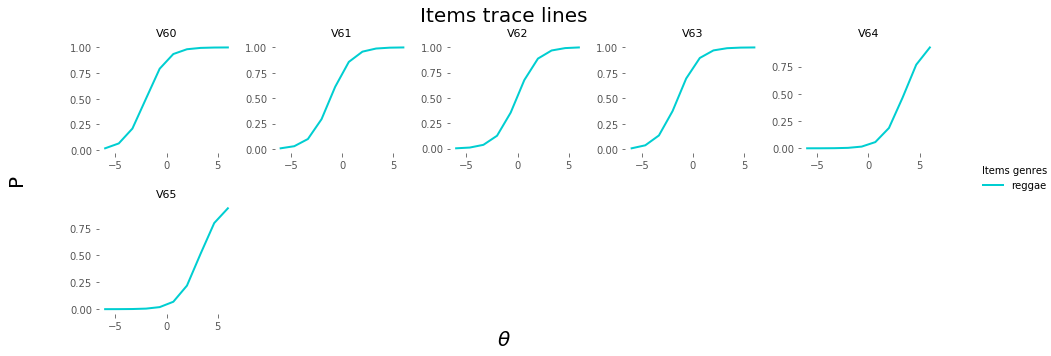

In [1304]:
icc_plots_all_items_in_genres(combined_thetas[index], combined_probs[index], indexes[index], song_genre = index, save_file_name = 'icc_plots_TfggsdgYX.png')

In [ ]:
14

In [635]:
def get_models_parameters(model = 'Rasch') :
      
    switcher={
        'Rasch' : 0,
        '1PL' : 1,
        '2PL': 2,
        '3PL': 3,
        }

    index = switcher.get(model,0)
    
    items_parameters = get_items_parameters_files()
    df_data = pd.read_csv(items_parameters[index])

    if "Guessing" not in df_data.columns :
        row, col = df_data.shape
        guess_param = [0]*row
        df_data.insert(col, "Guessing", guess_param )

    base = df_data.loc[:, ['Discrimination','Difficulty','Guessing']].to_numpy()
    a = base[:,0]
    b = base[:,1]
    c = base[:,2]
    
    return a, b, c

In [636]:
def item_characteristic_curve(a,b,c = 0) :
    
    #theta = np.arange(-6,7,1)
    theta = np.linspace(-6,6,10)
    L = a*(theta - b)
    expnl = 1 + np.exp(-L)
    P = c + (1 - c) / expnl
    
    return theta, P

def icc_plots(theta, P, x, y, save_file_name = 'icc_plots_TEST_XXXTRYX.png'):
    
    import matplotlib.pyplot as plt 
    count = 0
    total = len(thetas)
    y_axis_values = np.arange(0,total-10,10)
    plt.rc('lines', lw=2, c='r')

    fig = plt.figure(figsize=(10,7))
    fig.subplots_adjust(hspace=1.0, wspace=0.3)
    for i in range(1, len(thetas) + 1) :

            ax = fig.add_subplot(x, y, i)
            ax.plot(theta[count], P[count])
            title_obj = ax.set_title('V' + str(count + 1), fontsize = 10)
            
            show_y_axis = len(y_axis_values[np.isin(y_axis_values, count)]) == 1
            if count < (total - (total % 10) ) and not show_y_axis :
                ax.set_axis_off()
            elif show_y_axis :
                #print(i)
                ax.set_frame_on(False)
                ax.axes.get_xaxis().set_visible(False)
            else :
                ax.set_frame_on(False)
                ax.axes.get_yaxis().set_visible(False)
               
            # Upgrade count
            count = count + 1
            
    fig.suptitle("Items trace lines", fontsize = 20)
    fig.text(0.5, 0.04, r'$\theta$', ha='center', fontsize = 20)
    fig.text(0.04, 0.5, 'P', va='center', rotation='vertical', fontsize = 20)
    plt.savefig(save_file_name)  

In [637]:
#a0, b0, c0 = get_models_parameters(model = 'Rasch')
#a1, b1, c1 = get_models_parameters(model = '1PL')
#a2, b2, c2 = get_models_parameters(model = '2PL')
#a3, b3, c3 = get_models_parameters(model = '3PL')
a, b, c = get_models_parameters(model = '3PL')

In [638]:
thetas = []
probabilities = []
for i in range(len(a)) :
    theta, P = item_characteristic_curve(a[i],b[i],c[i])
    thetas.append(theta)
    probabilities.append(P)

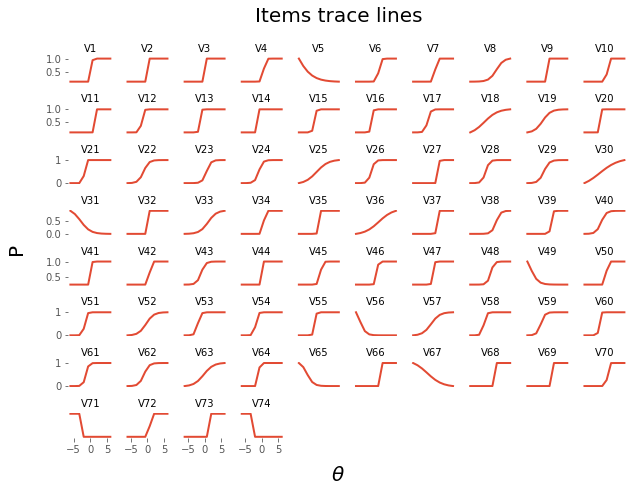

In [639]:
icc_plots(thetas, probabilities, 8, 10)

In [789]:
def icc_probability(theta, a,b,c = 0) :
    
    L = a*(theta - b)
    expnl = 1 + np.exp(-L)
    P = c + (1 - c) / expnl
    
    return P

def total_scores(a, b, c) :
    total_sum = []
    theta = np.linspace(-6,6,1000)
    for i in range(len(theta)) :
        theta_sum = sum(icc_probability(theta[i], a,b,c))
        total_sum.append(theta_sum)
        
    return theta, total_sum

In [790]:
a0, b0, c0 = get_models_parameters(model = 'Rasch')
a1, b1, c1 = get_models_parameters(model = '1PL')
a2, b2, c2 = get_models_parameters(model = '2PL')
a3, b3, c3 = get_models_parameters(model = '3PL')

theta0, total_sum0 = total_scores(a0, b0, c0) 
theta1, total_sum1 = total_scores(a1, b1, c1) 
theta2, total_sum2 = total_scores(a2, b2, c2) 
theta3, total_sum3 = total_scores(a3, b3, c3) 

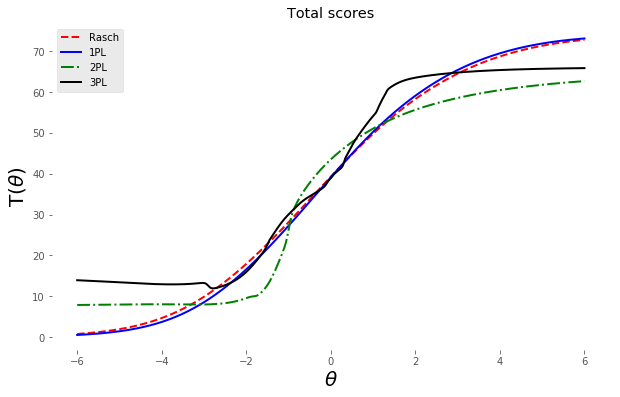

In [394]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(theta0, total_sum0, 'r--',  label = 'Rasch' )
ax.plot(theta1, total_sum1, color = 'blue', label = '1PL' )
ax.plot(theta2, total_sum2, 'g-.', label = '2PL'  )
ax.plot(theta3, total_sum3, color = 'black', label = '3PL'  )
ax.set_xlabel(r'$\theta$', color = "black", fontsize = 20)
ax.set_ylabel(r'T($\theta$)', color = "black", fontsize = 20)
leg = ax.legend(loc = 'best')
title_obj = ax.set_title('Total scores')
ax.set_frame_on(False)
#plt.savefig("Frequency_of_correct_responses_by_genres_"+ str(cat) + ".png") 

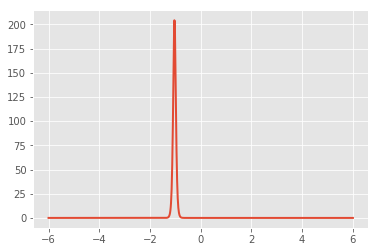

In [167]:
def item_information_curve( a,b,c, model = 'Rasch') :
    
    theta = np.linspace(-6,6,1000)
    theta_sum = icc_probability(theta, a,b,c)
    switcher={
        'Rasch' : theta_sum * (1 - theta_sum),
        '1PL' : (a**2) * theta_sum * (1 - theta_sum),
        '2PL': (a**2) * theta_sum * (1 - theta_sum),
        '3PL': (a**2) * ((1 - theta_sum)/ theta_sum ) * ((theta_sum - c)**2 / (1 - c)**2),
        }

    I = switcher.get(model,0)
    return theta, I

irt_model = '2PL'
a, b, c = get_models_parameters(model = irt_model)
i = 59
theta, I = item_information_curve(a[i],b[i],c[i], model = irt_model)
plt.plot(theta, I )


In [188]:
#irt_model = 'Rasch'
#irt_model = '1PL'
irt_model = '3PL'
#irt_model = '3PL'
a, b, c = get_models_parameters(model = irt_model)
thetas = []
infos = []
for i in range(len(a)) :
    theta, I = item_information_curve(a[i],b[i],c[i], model = irt_model)
    thetas.append(theta)
    infos.append(I)

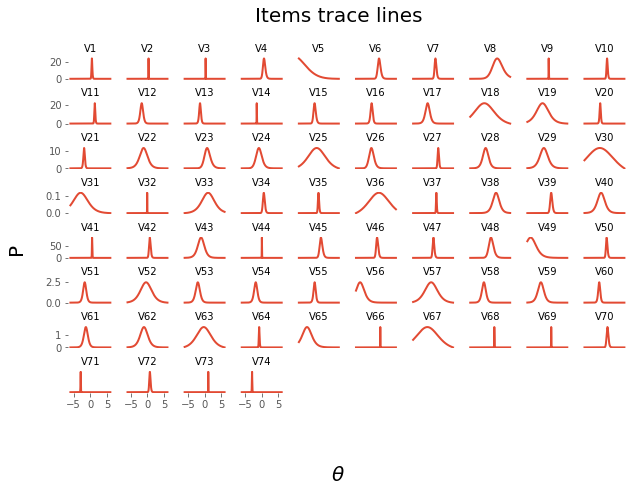

In [193]:
icc_plots(thetas, infos, 9, 10)

In [170]:
def test_information_curve(theta, a,b,c, model = 'Rasch') :
    """
    theta : scalar
    a,b,c : vectors 
    """
    theta_sum = icc_probability(theta, a,b,c)
    switcher={
        'Rasch' : theta_sum * (1 - theta_sum),
        '1PL' : (a**2) * theta_sum * (1 - theta_sum),
        '2PL': (a**2) * theta_sum * (1 - theta_sum),
        '3PL': (a**2) * ((1 - theta_sum)/ theta_sum ) * ((theta_sum - c)**2 / (1 - c)**2),
        }

    I = switcher.get(model,0)
    return np.sum(I)

In [ ]:
irt_model = '2PL'
a, b, c = get_models_parameters(model = irt_model)
theta = 0.5
test_information_curve(theta, a,b,c, model = irt_model)

In [1261]:
def plot_info(theta0, total_sum0, label = 'Rasch') :
    fig, ax = plt.subplots(1,1,figsize=(10,6))
    ax.plot(theta0, total_sum0, 'r--',  label = label )
    ax.set_xlabel(r'$\theta$', color = "black", fontsize = 20)
    ax.set_ylabel(r'T($\theta$)', color = "black", fontsize = 20)
    leg = ax.legend(loc = 'best')
    title_obj = ax.set_title('Total scores')
    ax.set_frame_on(False)

def test_information_scores(a, b, c, model = '2PL') :
    total_sum = []
    theta = np.linspace(-6,6,1000)
    for i in range(len(theta)) :
        I_sum = test_information_curve(theta[i], a,b,c, model = irt_model)
        total_sum.append(I_sum)
        
    return theta, total_sum

In [1262]:
a0, b0, c0 = get_models_parameters(model = 'Rasch')
a1, b1, c1 = get_models_parameters(model = '1PL')
a2, b2, c2 = get_models_parameters(model = '2PL')
a3, b3, c3 = get_models_parameters(model = '3PL')

theta0, total_sum0 = test_information_scores(a0, b0, c0, model = 'Rasch') 
theta1, total_sum1 = test_information_scores(a1, b1, c1, model = '1PL') 
theta2, total_sum2 = test_information_scores(a2, b2, c2, model = '2PL') 
theta3, total_sum3 = test_information_scores(a3, b3, c3, model = '3PL') 

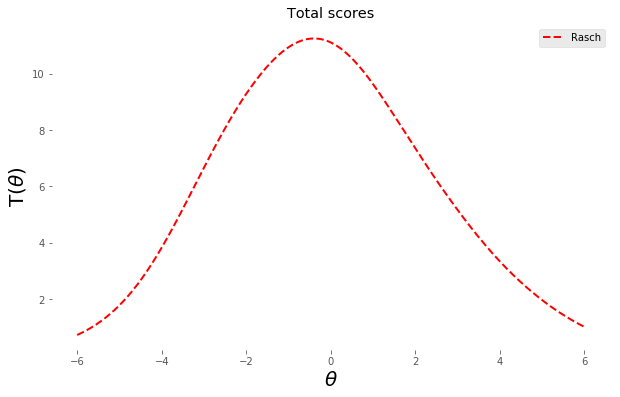

In [1263]:
plot_info(theta0, total_sum0, label = 'Rasch')

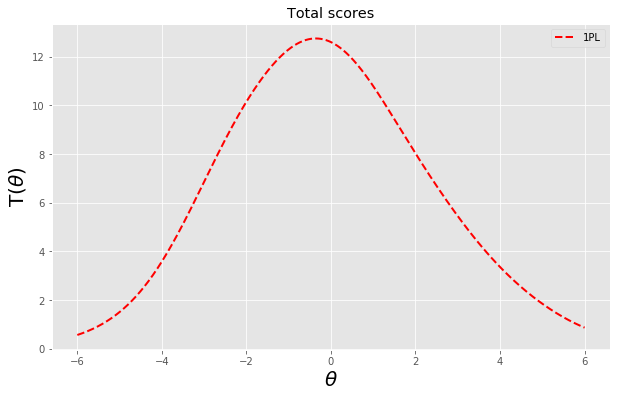

In [185]:
plot_info(theta1, total_sum1, label = '1PL')

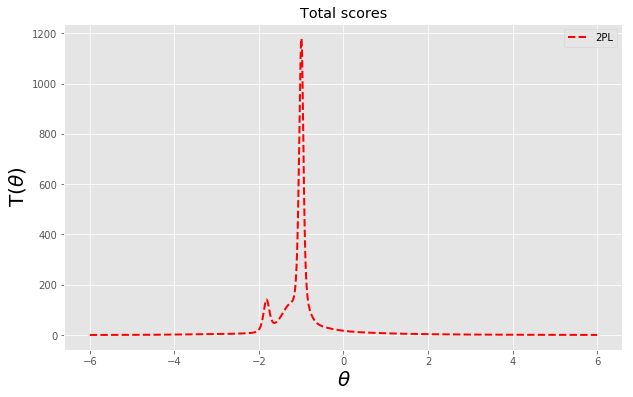

In [186]:
plot_info(theta2, total_sum2, label = '2PL')

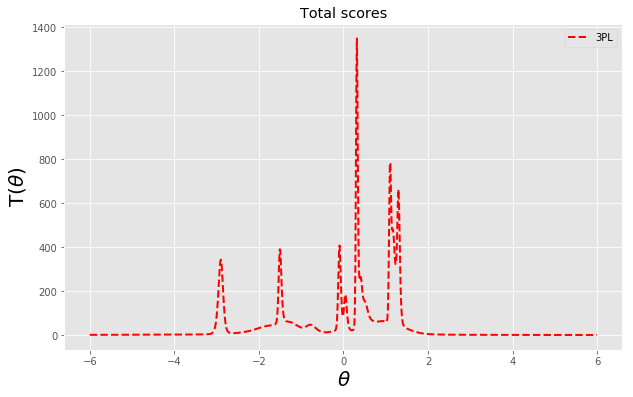

In [227]:
plot_info(theta3, total_sum3, label = '3PL')

In [241]:
a0, b0, c0 = get_models_parameters(model = 'Rasch')
a1, b1, c1 = get_models_parameters(model = '1PL')
a2, b2, c2 = get_models_parameters(model = '2PL')
a3, b3, c3 = get_models_parameters(model = '3PL')

theta0, total_sum0 = test_information_scores(a0, b0, c0, model = 'Rasch') 
theta1, total_sum1 = test_information_scores(a1, b1, c1, model = '1PL') 
theta2, total_sum2 = test_information_scores(a2, b2, c2, model = '2PL') 
theta3, total_sum3 = test_information_scores(a3, b3, c3, model = '3PL') 


standard_error0 = 1 / np.sqrt(total_sum0)
standard_error1 = 1 / np.sqrt(total_sum1)
standard_error2 = 1 / np.sqrt(total_sum2)
standard_error3 = 1 / np.sqrt(total_sum3)

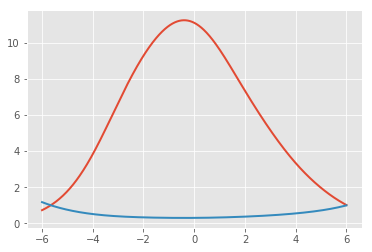

In [242]:
plt.plot(theta0, total_sum0)
plt.plot(theta0, standard_error0)

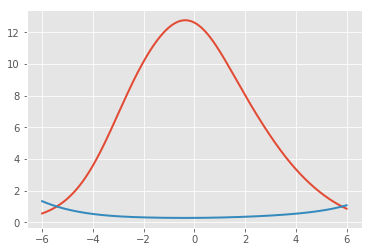

In [243]:
plt.plot(theta1, total_sum1)
plt.plot(theta1, standard_error1)

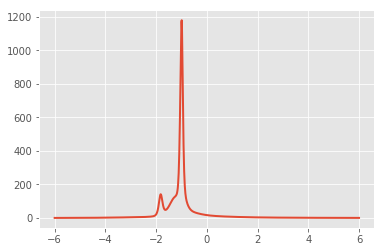

In [244]:
plt.plot(theta2, total_sum2)

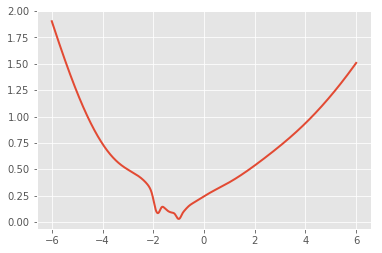

In [245]:
plt.plot(theta2, standard_error2)

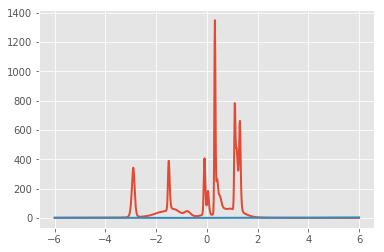

In [248]:
plt.plot(theta3, total_sum3)
plt.plot(theta3, standard_error3)